# Stress recognition in automobile

# 1. Data display

Install WFDB, a tool library for reading, writing and processing WFDB signals and comments,which is used in the project to read .dat files 

In [1]:
import numpy as np
import pandas as pd
import os
import wfdb
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
# Read the original biological signal 
all_signal=[]
meta_data=[]
for file in sorted(os.listdir("drivedb/1.0.0/")):
    if file.endswith(".dat"):
        # Use wfdb.rdsamp to read wfdb data. 
        # signals is a 2d numpy array used to store the physical signals in the record. 
        # fields contains a dictionary of several key attributes for reading records (fs|units|sig_name|comments) 
        signals, fields = wfdb.rdsamp("drivedb/1.0.0/" + os.path.splitext(file)[0])
        # Signal data, including various biological signals during 18 driving 
        all_signal.append(signals)
        # Signal data structure, data unit, etc. 
        meta_data.append(fields)

In [3]:
signal = np.array(all_signal[0])

In [4]:
# 检查信号是否完整

In [5]:
#挑出所有marker
marker = []
signal = np.array(all_signal[4])

In [6]:
signal

array([[-5.400e-02,  3.730e-01,  6.252e+00, ...,  8.900e+01,  1.248e+01,
         3.367e+01],
       [-1.000e-03,  2.490e-01,  6.252e+00, ...,  8.900e+01,  1.248e+01,
         3.329e+01],
       [-1.000e-01,  3.520e-01,  6.248e+00, ...,  8.900e+01,  1.248e+01,
         3.294e+01],
       ...,
       [ 1.640e-01,  6.340e+00,  2.663e+00, ...,  7.700e+01,  1.848e+01,
         3.060e+01],
       [ 1.570e-01,  4.517e+00,  2.662e+00, ...,  7.700e+01,  1.850e+01,
         3.101e+01],
       [-5.400e-02,  5.656e+00,  2.662e+00, ...,  7.700e+01,  1.850e+01,
         3.140e+01]])

In [7]:
# 挑出所有的ECG信号
ECG_signal = []
for i in range(18):
    signal = np.array(all_signal[i])
    ECG_signal.append(signal[:,0])

In [8]:
ECG_signal[0]

array([-0.03 , -0.026, -0.016, ...,  0.067,  0.054,  0.049])

In [9]:
handGSR2 = []
signal = np.array(all_signal[2])

In [10]:
handGSR2.append(signal[:,2])

In [11]:
handGSR2

[array([0.   , 0.   , 0.   , ..., 2.583, 2.583, 2.58 ])]

In [21]:
np.savetxt('handGSR_3.csv',handGSR2[0],delimiter=',')

In [12]:
# Display the total driving time of each driver, the number of collected signals, and the name of each signal 
i=1
for item in meta_data:
    print("driver",i)
    i=i+1
    print("total time(min):", round(item['sig_len']/15.5/60, 2))
    print("sigal number:",item['n_sig'])
    print("sigal name:",item['sig_name'])
    print("--------------------")

driver 1
total time(min): 66.13
sigal number: 6
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'RESP']
--------------------
driver 2
total time(min): 83.93
sigal number: 5
sigal name: ['ECG', 'foot GSR', 'HR', 'marker', 'RESP']
--------------------
driver 3
total time(min): 185.43
sigal number: 4
sigal name: ['ECG', 'foot GSR', 'hand GSR', 'RESP']
--------------------
driver 4
total time(min): 82.01
sigal number: 6
sigal name: ['ECG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 5
total time(min): 84.27
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 6
total time(min): 80.78
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 7
total time(min): 88.65
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSr', 'HR', 'marker', 'RESP']
--------------------
driver 8
total time(min): 81.19
sigal number: 7
si

In [7]:
# Display the total driving time of each driver, the number of collected signals, and the name of each signal 
i=1
for item in meta_data:
    print("driver",i)
    i=i+1
    print("total data:", round(item['sig_len']))
    print("sigal number:",item['n_sig'])
    print("sigal name:",item['sig_name'])
    print("--------------------")

driver 1
total data: 61499
sigal number: 6
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'RESP']
--------------------
driver 2
total data: 78056
sigal number: 5
sigal name: ['ECG', 'foot GSR', 'HR', 'marker', 'RESP']
--------------------
driver 3
total data: 172447
sigal number: 4
sigal name: ['ECG', 'foot GSR', 'hand GSR', 'RESP']
--------------------
driver 4
total data: 76266
sigal number: 6
sigal name: ['ECG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 5
total data: 78367
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 6
total data: 75123
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP']
--------------------
driver 7
total data: 82442
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'hand GSr', 'HR', 'marker', 'RESP']
--------------------
driver 8
total data: 75509
sigal number: 7
sigal name: ['ECG', 'EMG', 'foot GSR', 'ha

In [37]:
# Display the total driving time of each driver, the number of collected signals, and the name of each signal 
i=1
for item in meta_data:
        print("driver",i,end="\t")
        i=i+1
        print("total data:", round(item['sig_len']),end="\t")
        print("signal number:",item['n_sig'])

driver 1	total data: 61499	signal number: 6
driver 2	total data: 78056	signal number: 5
driver 3	total data: 172447	signal number: 4
driver 4	total data: 76266	signal number: 6
driver 5	total data: 78367	signal number: 7
driver 6	total data: 75123	signal number: 7
driver 7	total data: 82442	signal number: 7
driver 8	total data: 75509	signal number: 7
driver 9	total data: 65912	signal number: 7
driver 10	total data: 75592	signal number: 7
driver 11	total data: 75533	signal number: 7
driver 12	total data: 77257	signal number: 7
driver 13	total data: 74836	signal number: 6
driver 14	total data: 74836	signal number: 6
driver 15	total data: 72209	signal number: 7
driver 16	total data: 60418	signal number: 7
driver 17	total data: 26132	signal number: 7
driver 18	total data: 23655	signal number: 7


In [36]:
# Display the total driving time of each driver, the number of collected signals, and the name of each signal 
i=1
for item in meta_data:
    i = i + 1
    if item['n_sig']== 7:
        print("driver",i-1, end="\t")
        print("total data:", round(item['sig_len']),end="\t")
        print("signal number:",item['n_sig'])

driver 5	total data: 78367	signal number: 7
driver 6	total data: 75123	signal number: 7
driver 7	total data: 82442	signal number: 7
driver 8	total data: 75509	signal number: 7
driver 9	total data: 65912	signal number: 7
driver 10	total data: 75592	signal number: 7
driver 11	total data: 75533	signal number: 7
driver 12	total data: 77257	signal number: 7
driver 15	total data: 72209	signal number: 7
driver 16	total data: 60418	signal number: 7
driver 17	total data: 26132	signal number: 7
driver 18	total data: 23655	signal number: 7


In [12]:
i=1
for item in meta_data:
    print("driver",i)
    i=i+1
    if item['n_sig']==7:
        print("data number:", round(item['sig_len']))
        print("sigal number:",item['n_sig'])
        print("--------------------")

driver 1
driver 2
driver 3
driver 4
driver 5
data number: 78367
sigal number: 7
--------------------
driver 6
data number: 75123
sigal number: 7
--------------------
driver 7
data number: 82442
sigal number: 7
--------------------
driver 8
data number: 75509
sigal number: 7
--------------------
driver 9
data number: 65912
sigal number: 7
--------------------
driver 10
data number: 75592
sigal number: 7
--------------------
driver 11
data number: 75533
sigal number: 7
--------------------
driver 12
data number: 77257
sigal number: 7
--------------------
driver 13
driver 14
driver 15
data number: 72209
sigal number: 7
--------------------
driver 16
data number: 60418
sigal number: 7
--------------------
driver 17
data number: 26132
sigal number: 7
--------------------
driver 18
data number: 23655
sigal number: 7
--------------------


从以上数据我们可以看出，司机5、6、7、8、9、10、11、12、15、16十位信息是记录完整的，拥有全部七条信号和足够长的时间，之后的分析中，我们就采用这十位司机的生物数据

In [13]:
# The information in meta_data is used to interpret all_signal bioelectric signals 
meta_data

[{'fs': 15.5,
  'sig_len': 61499,
  'n_sig': 6,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'mV', 'mV', 'bpm', 'mV'],
  'sig_name': ['ECG', 'EMG', 'foot GSR', 'hand GSR', 'HR', 'RESP'],
  'comments': []},
 {'fs': 15.5,
  'sig_len': 78056,
  'n_sig': 5,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'bpm', 'mV', 'mV'],
  'sig_name': ['ECG', 'foot GSR', 'HR', 'marker', 'RESP'],
  'comments': []},
 {'fs': 31,
  'sig_len': 172447,
  'n_sig': 4,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'mV', 'mV'],
  'sig_name': ['ECG', 'foot GSR', 'hand GSR', 'RESP'],
  'comments': []},
 {'fs': 15.5,
  'sig_len': 76266,
  'n_sig': 6,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'mV', 'bpm', 'mV', 'mV'],
  'sig_name': ['ECG', 'foot GSR', 'hand GSR', 'HR', 'marker', 'RESP'],
  'comments': []},
 {'fs': 15.5,
  'sig_len': 78367,
  'n_sig': 7,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV', 'mV', 'mV', 'bpm'

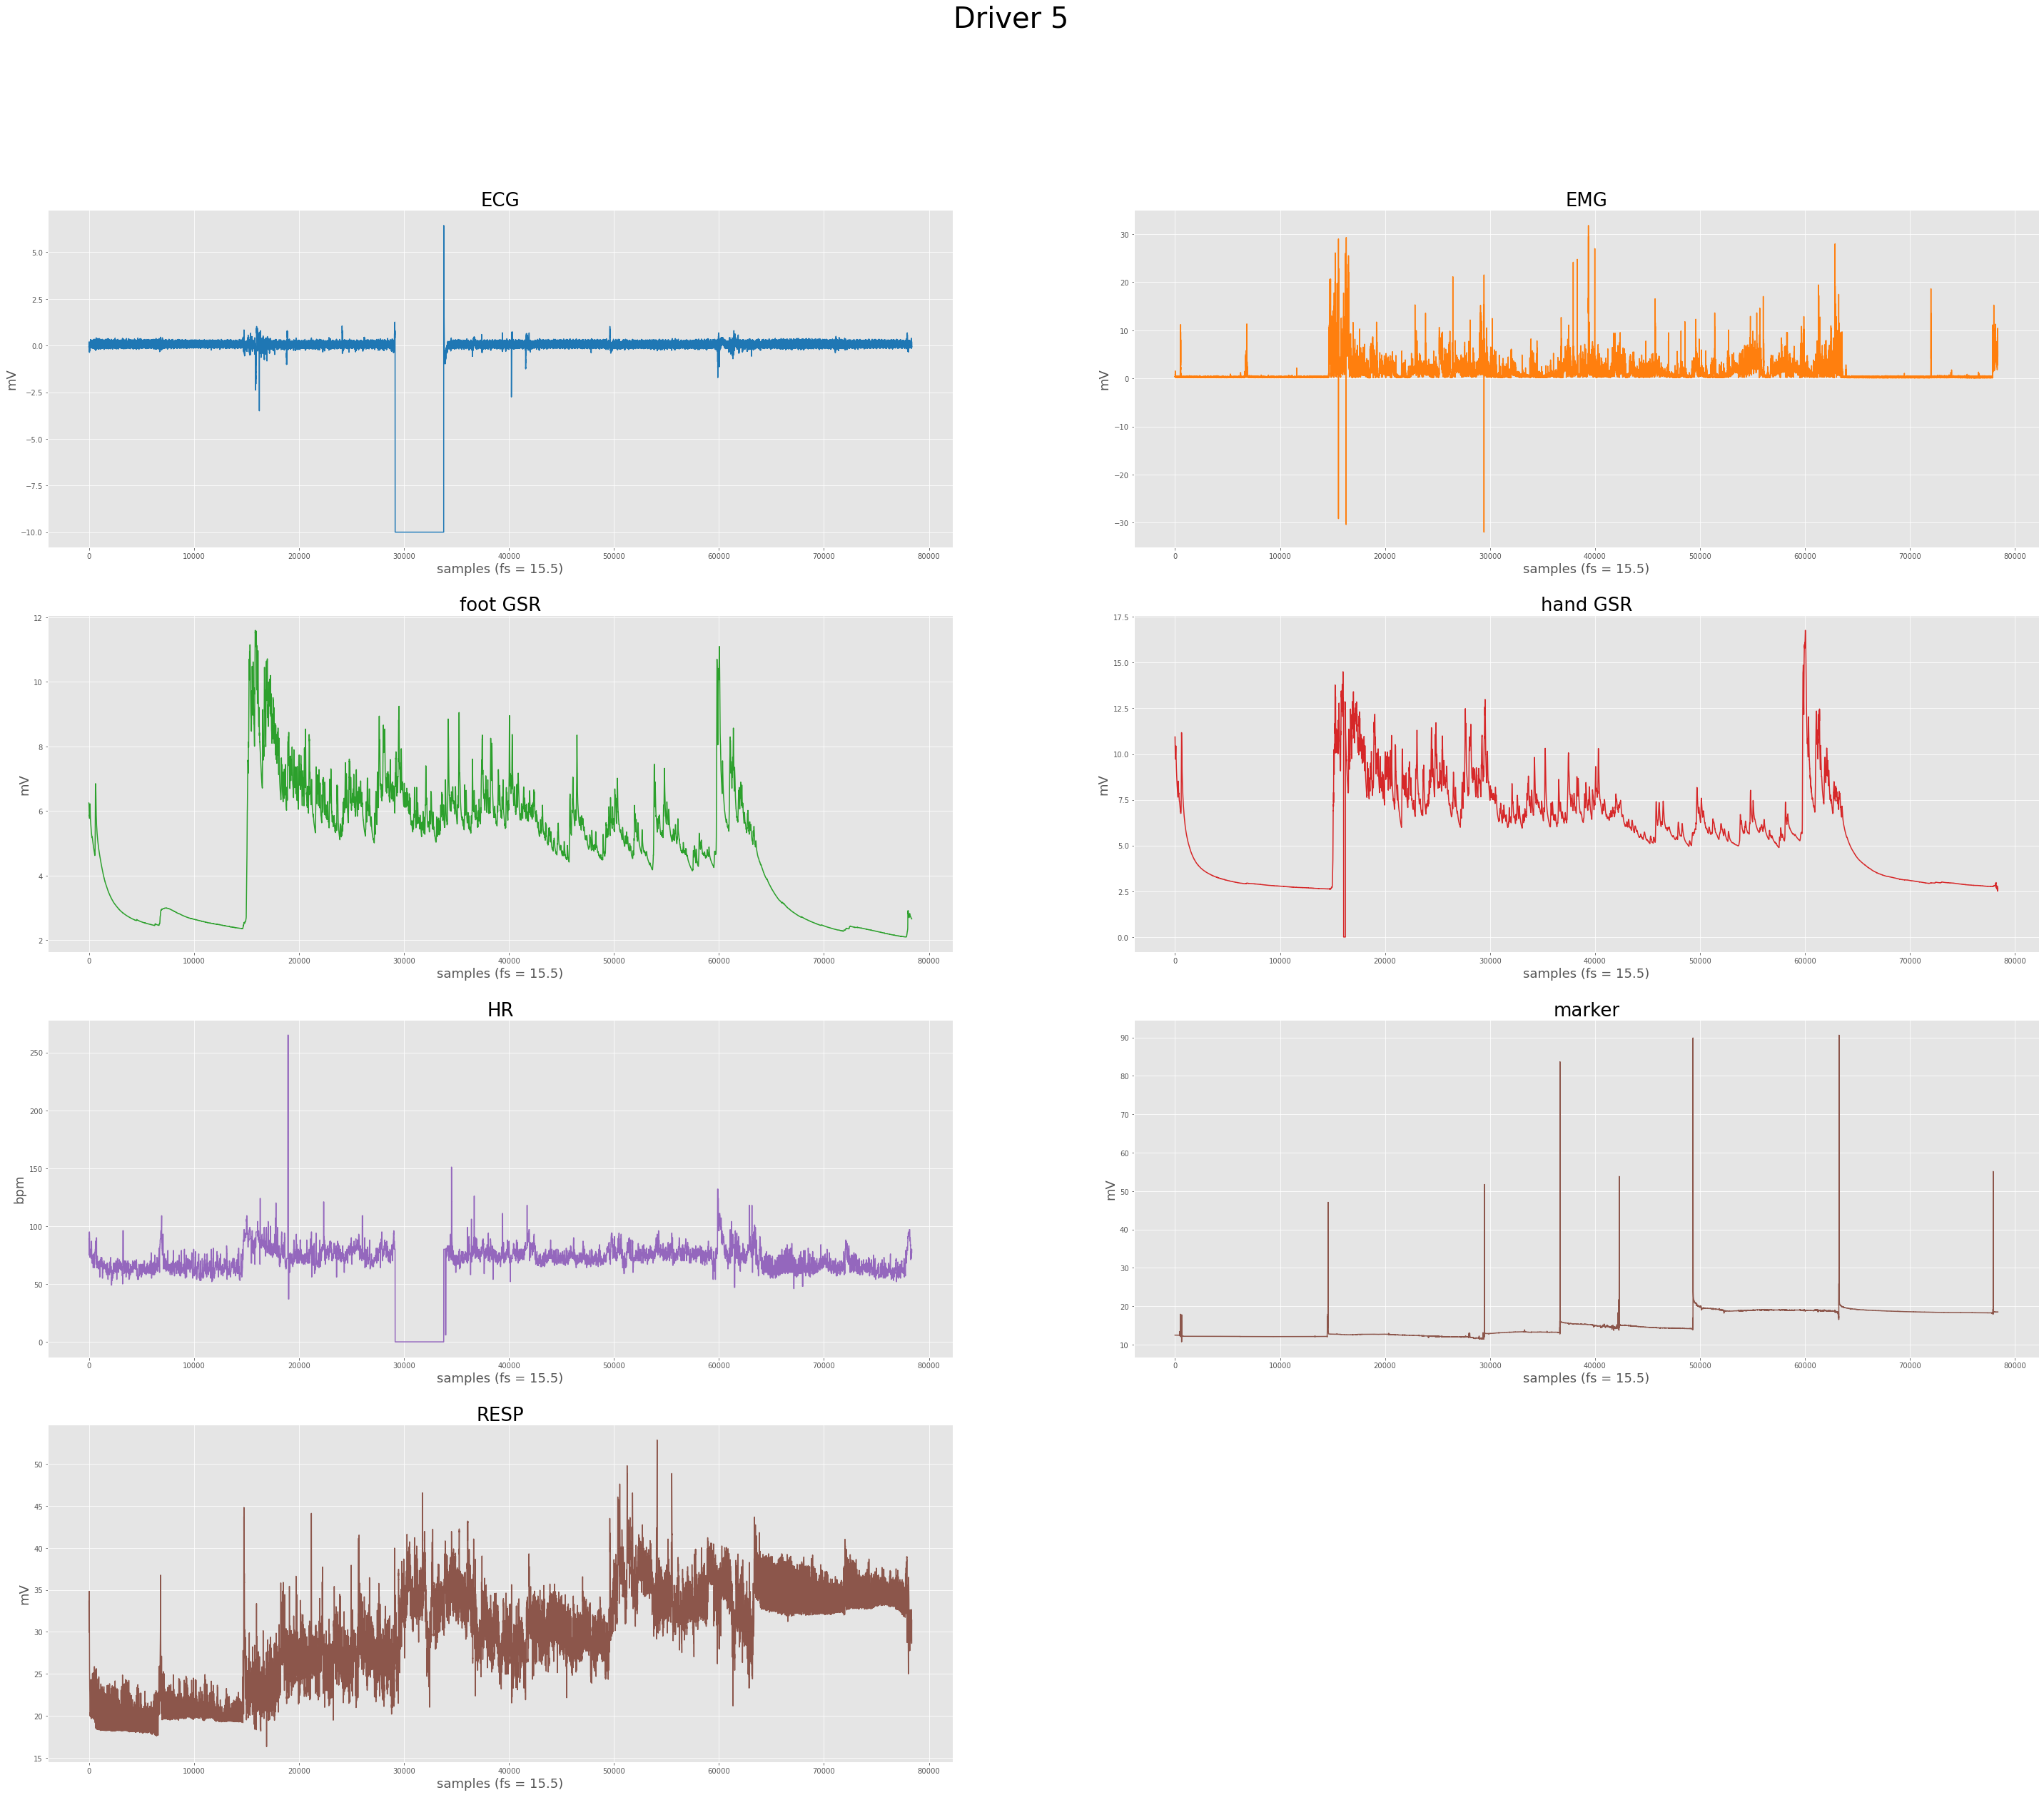

In [14]:
# Plot the sensor data of the fifth driver throughout the journey 
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 5", fontsize=40)
for i in range(all_signal[4].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[4]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[4].T[i], color=my_colors[i])
    plt.title(meta_data[4]['sig_name'][i],fontsize=26)

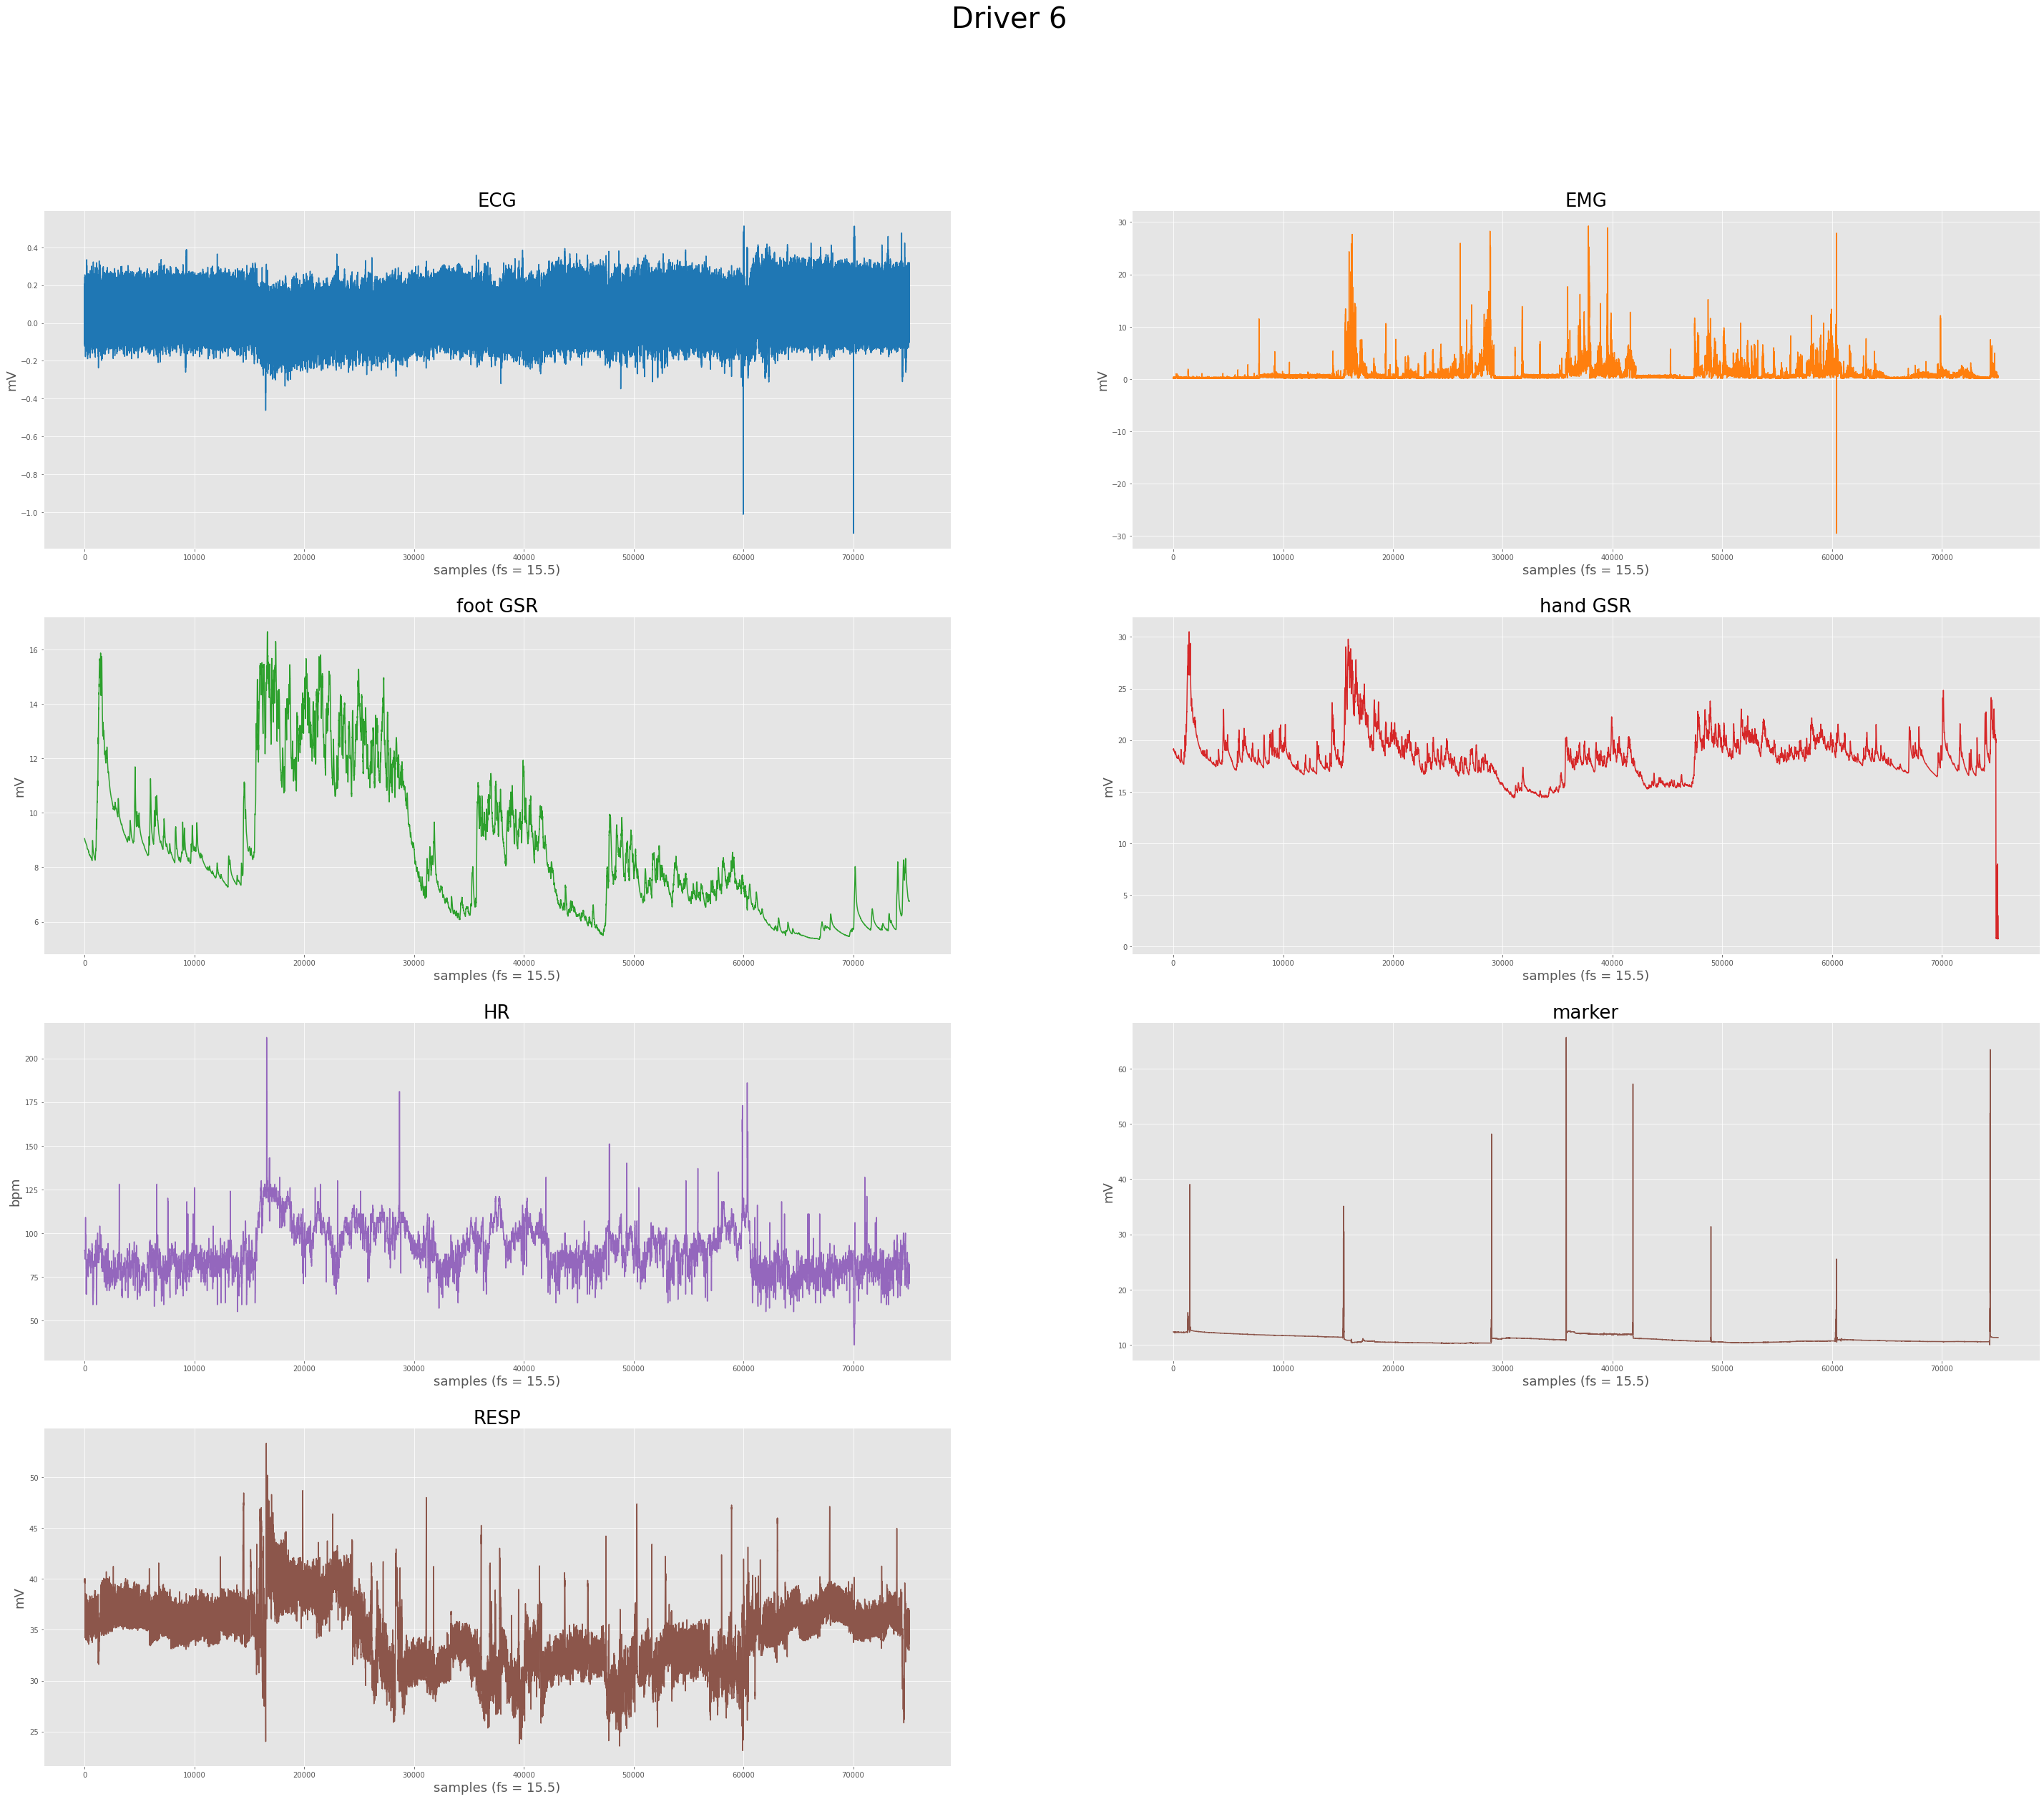

In [15]:
# Plot the sensor data of the sixth driver throughout the journey 
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 6", fontsize=40)
for i in range(all_signal[5].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[5]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[5].T[i], color=my_colors[i])
    plt.title(meta_data[5]['sig_name'][i],fontsize=26)

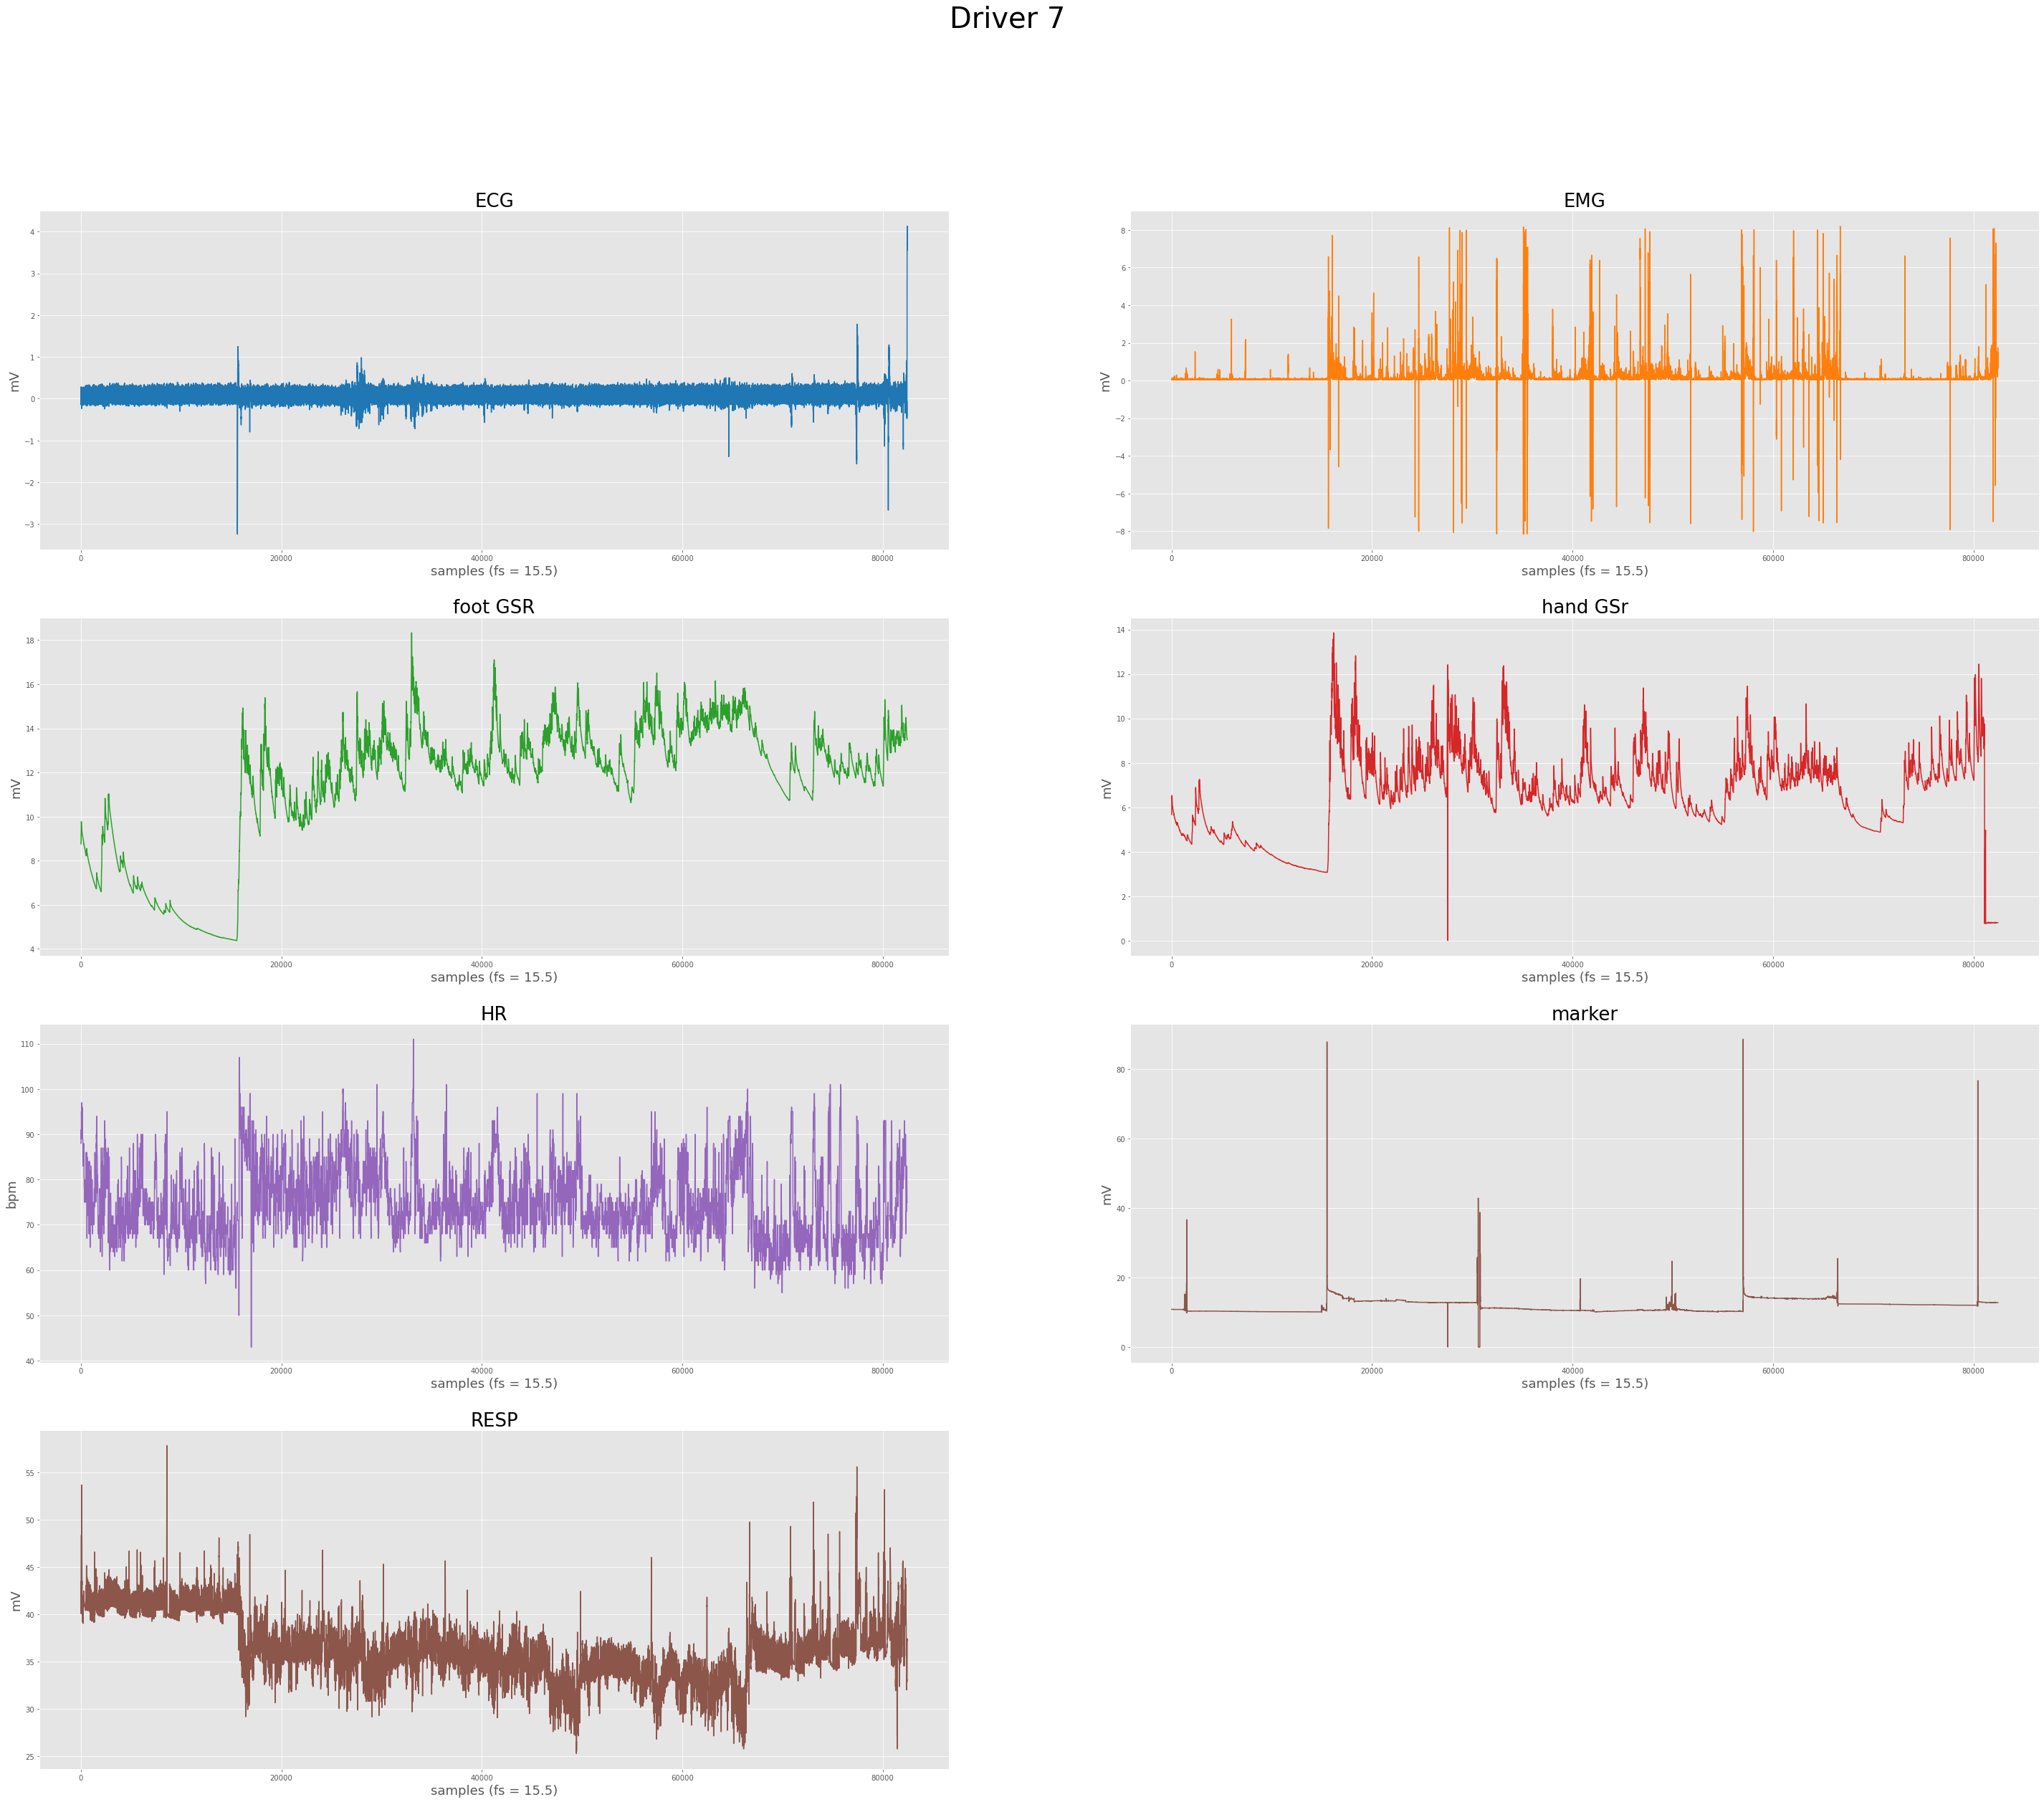

In [17]:
# Plot the sensor data of the 7th driver throughout the journey 
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 7", fontsize=40)
for i in range(all_signal[6].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[6]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[6].T[i], color=my_colors[i])
    plt.title(meta_data[6]['sig_name'][i],fontsize=26)

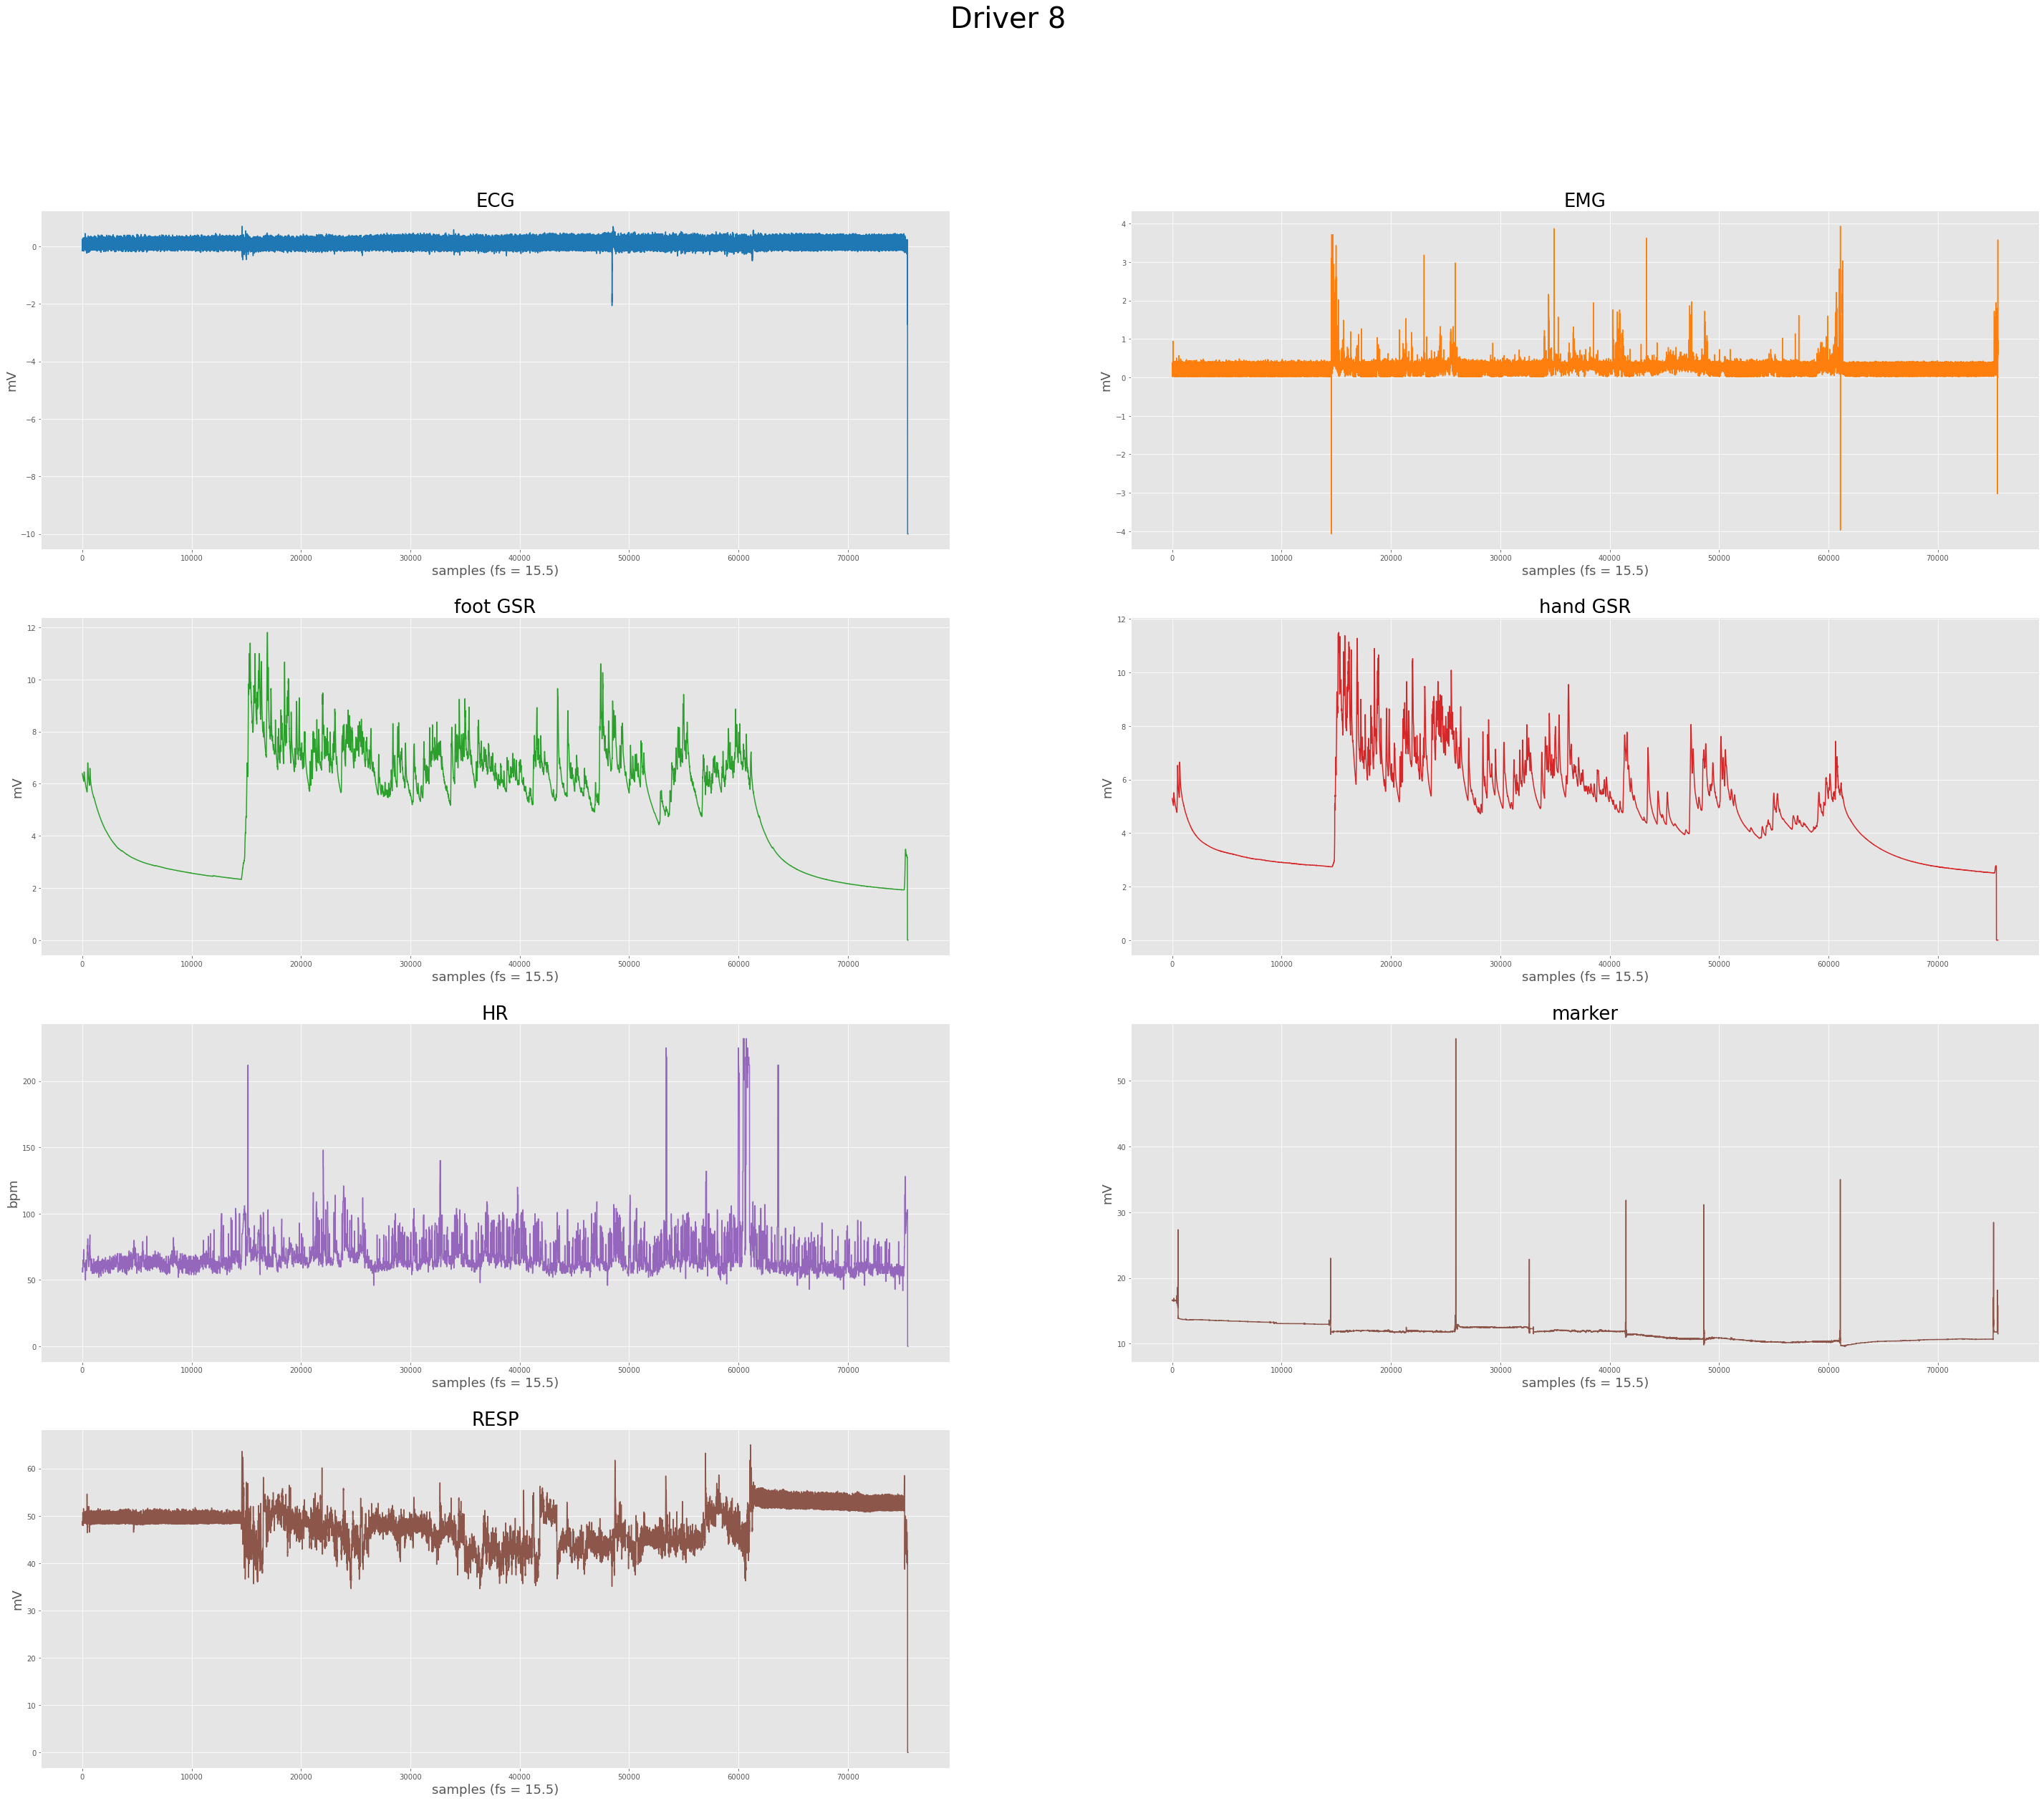

In [18]:
# Plot the sensor data of the 8th driver throughout the journey 
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 8", fontsize=40)
for i in range(all_signal[7].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[7]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[7].T[i], color=my_colors[i])
    plt.title(meta_data[7]['sig_name'][i],fontsize=26)

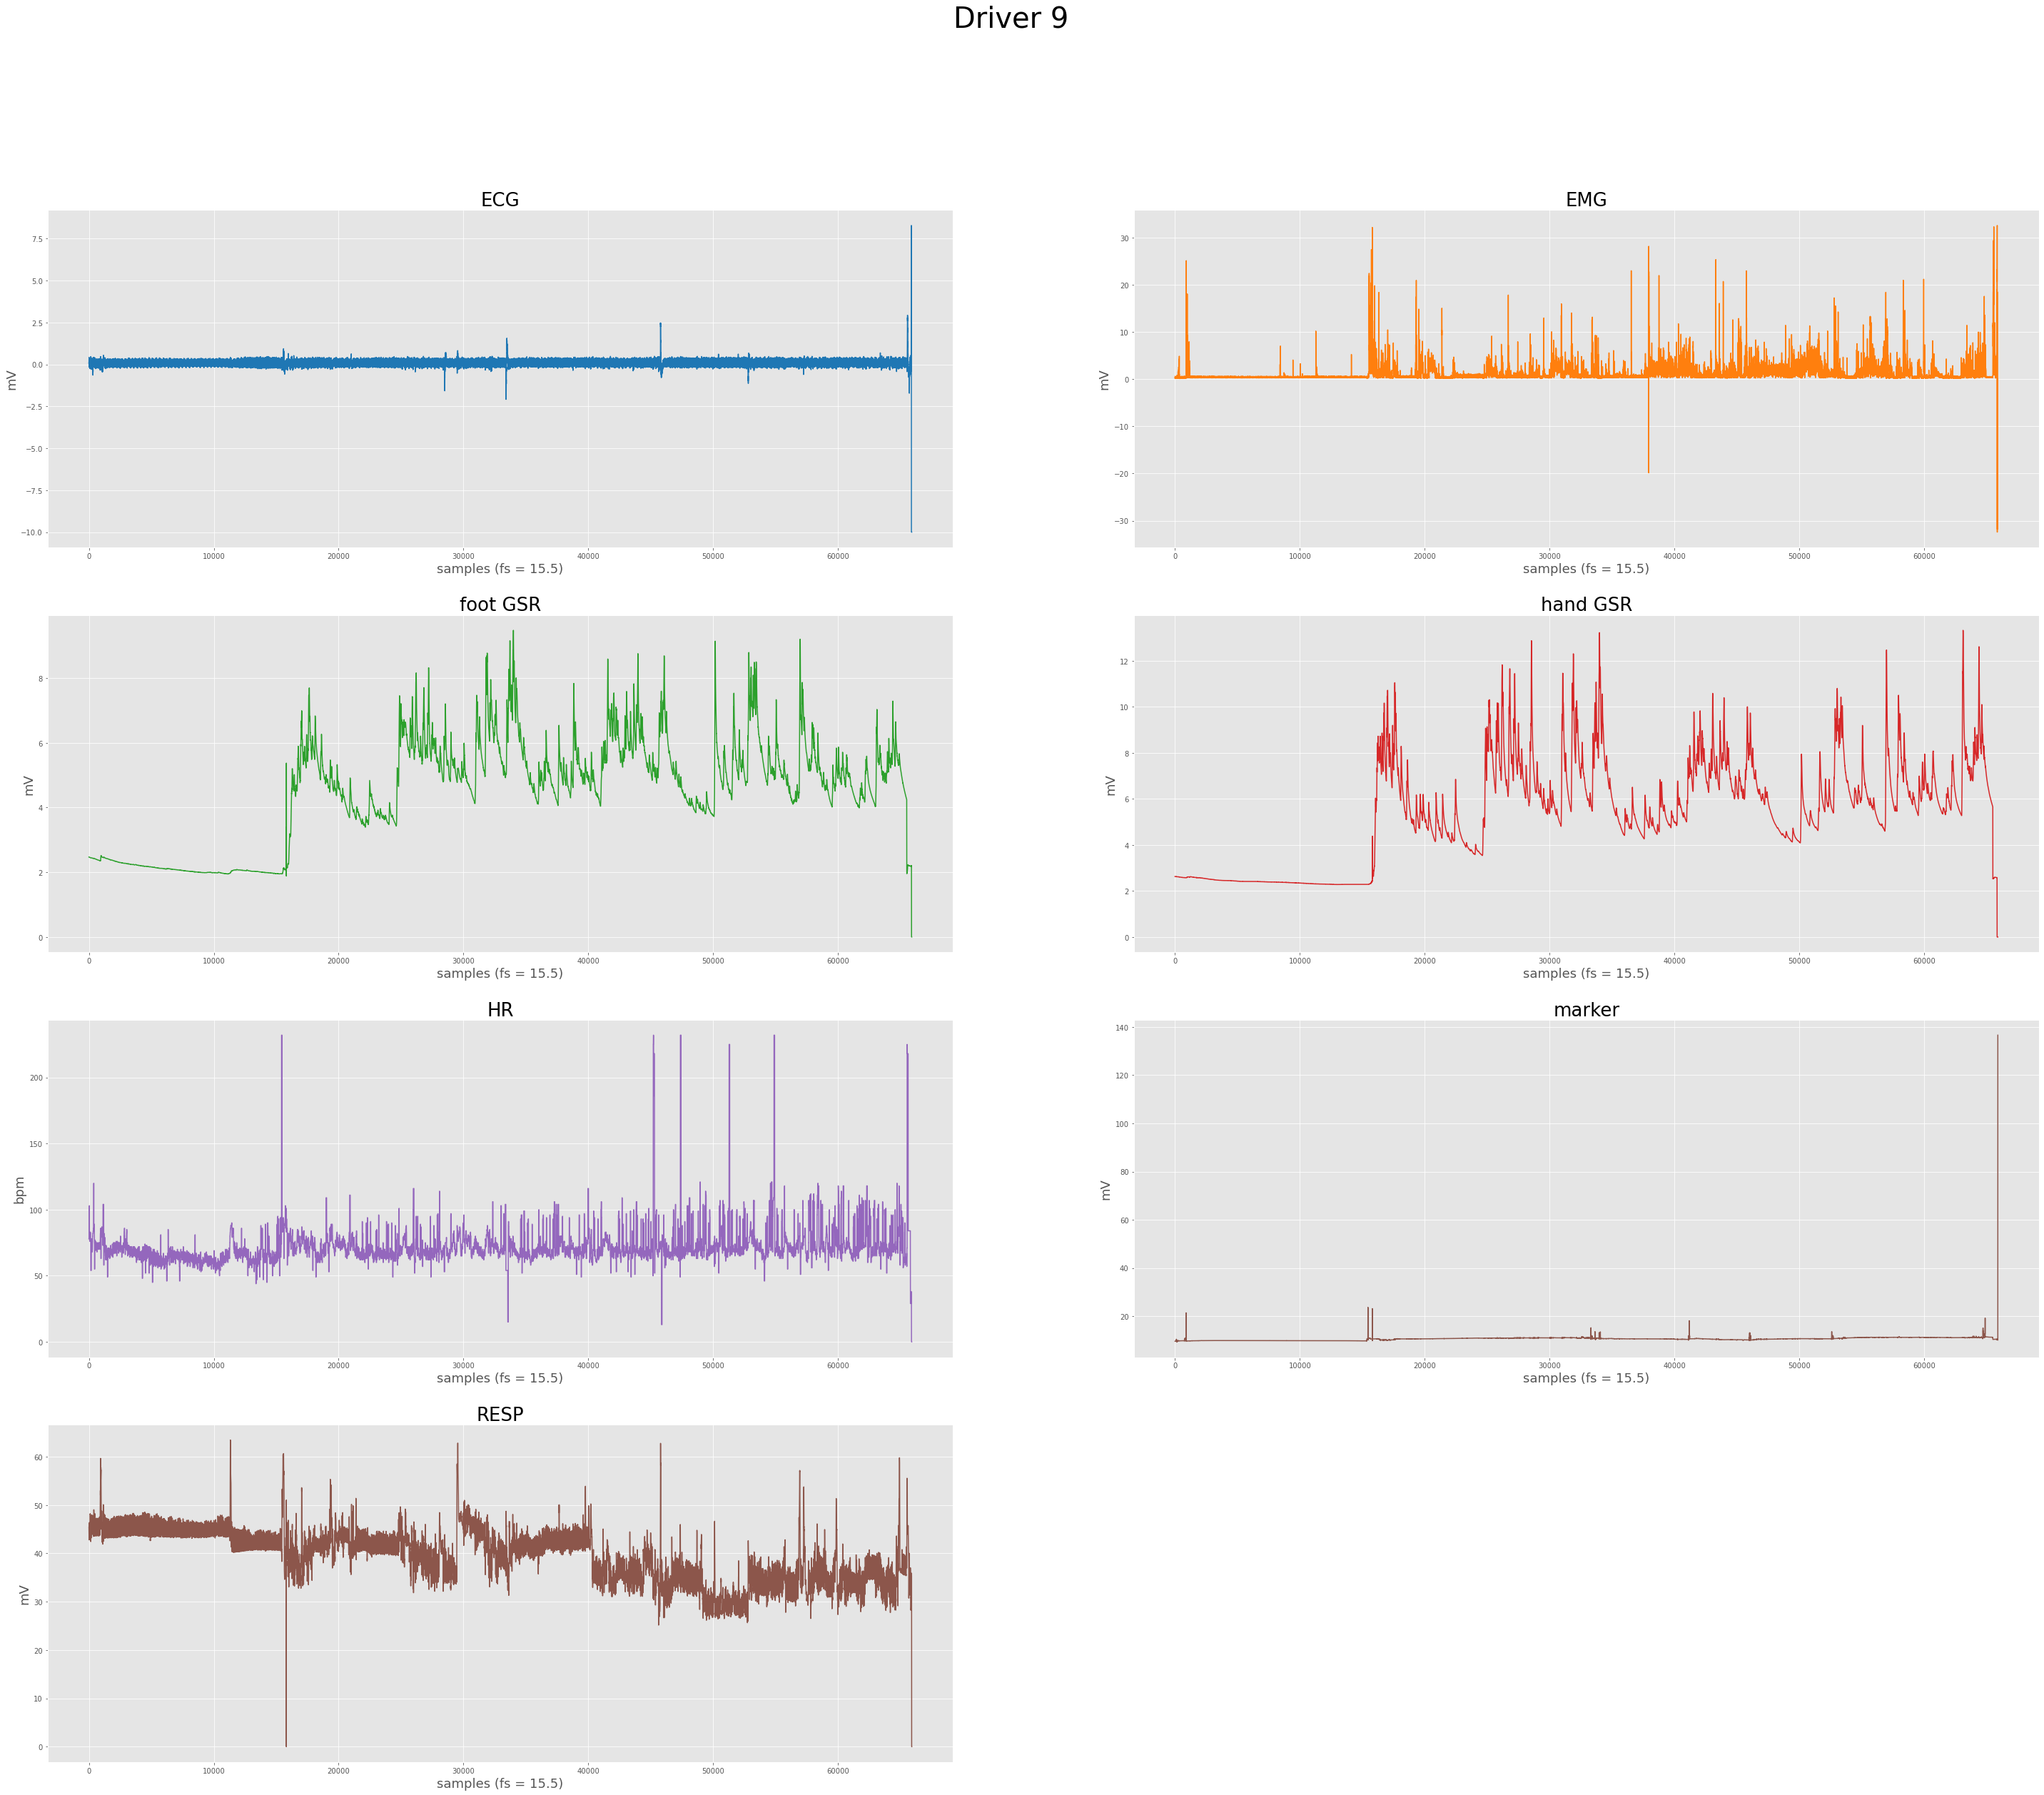

In [39]:
# Plot the sensor data of the 9th driver throughout the journey 
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 9", fontsize=40)
for i in range(all_signal[8].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[8]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[8].T[i], color=my_colors[i])
    plt.title(meta_data[8]['sig_name'][i],fontsize=26)

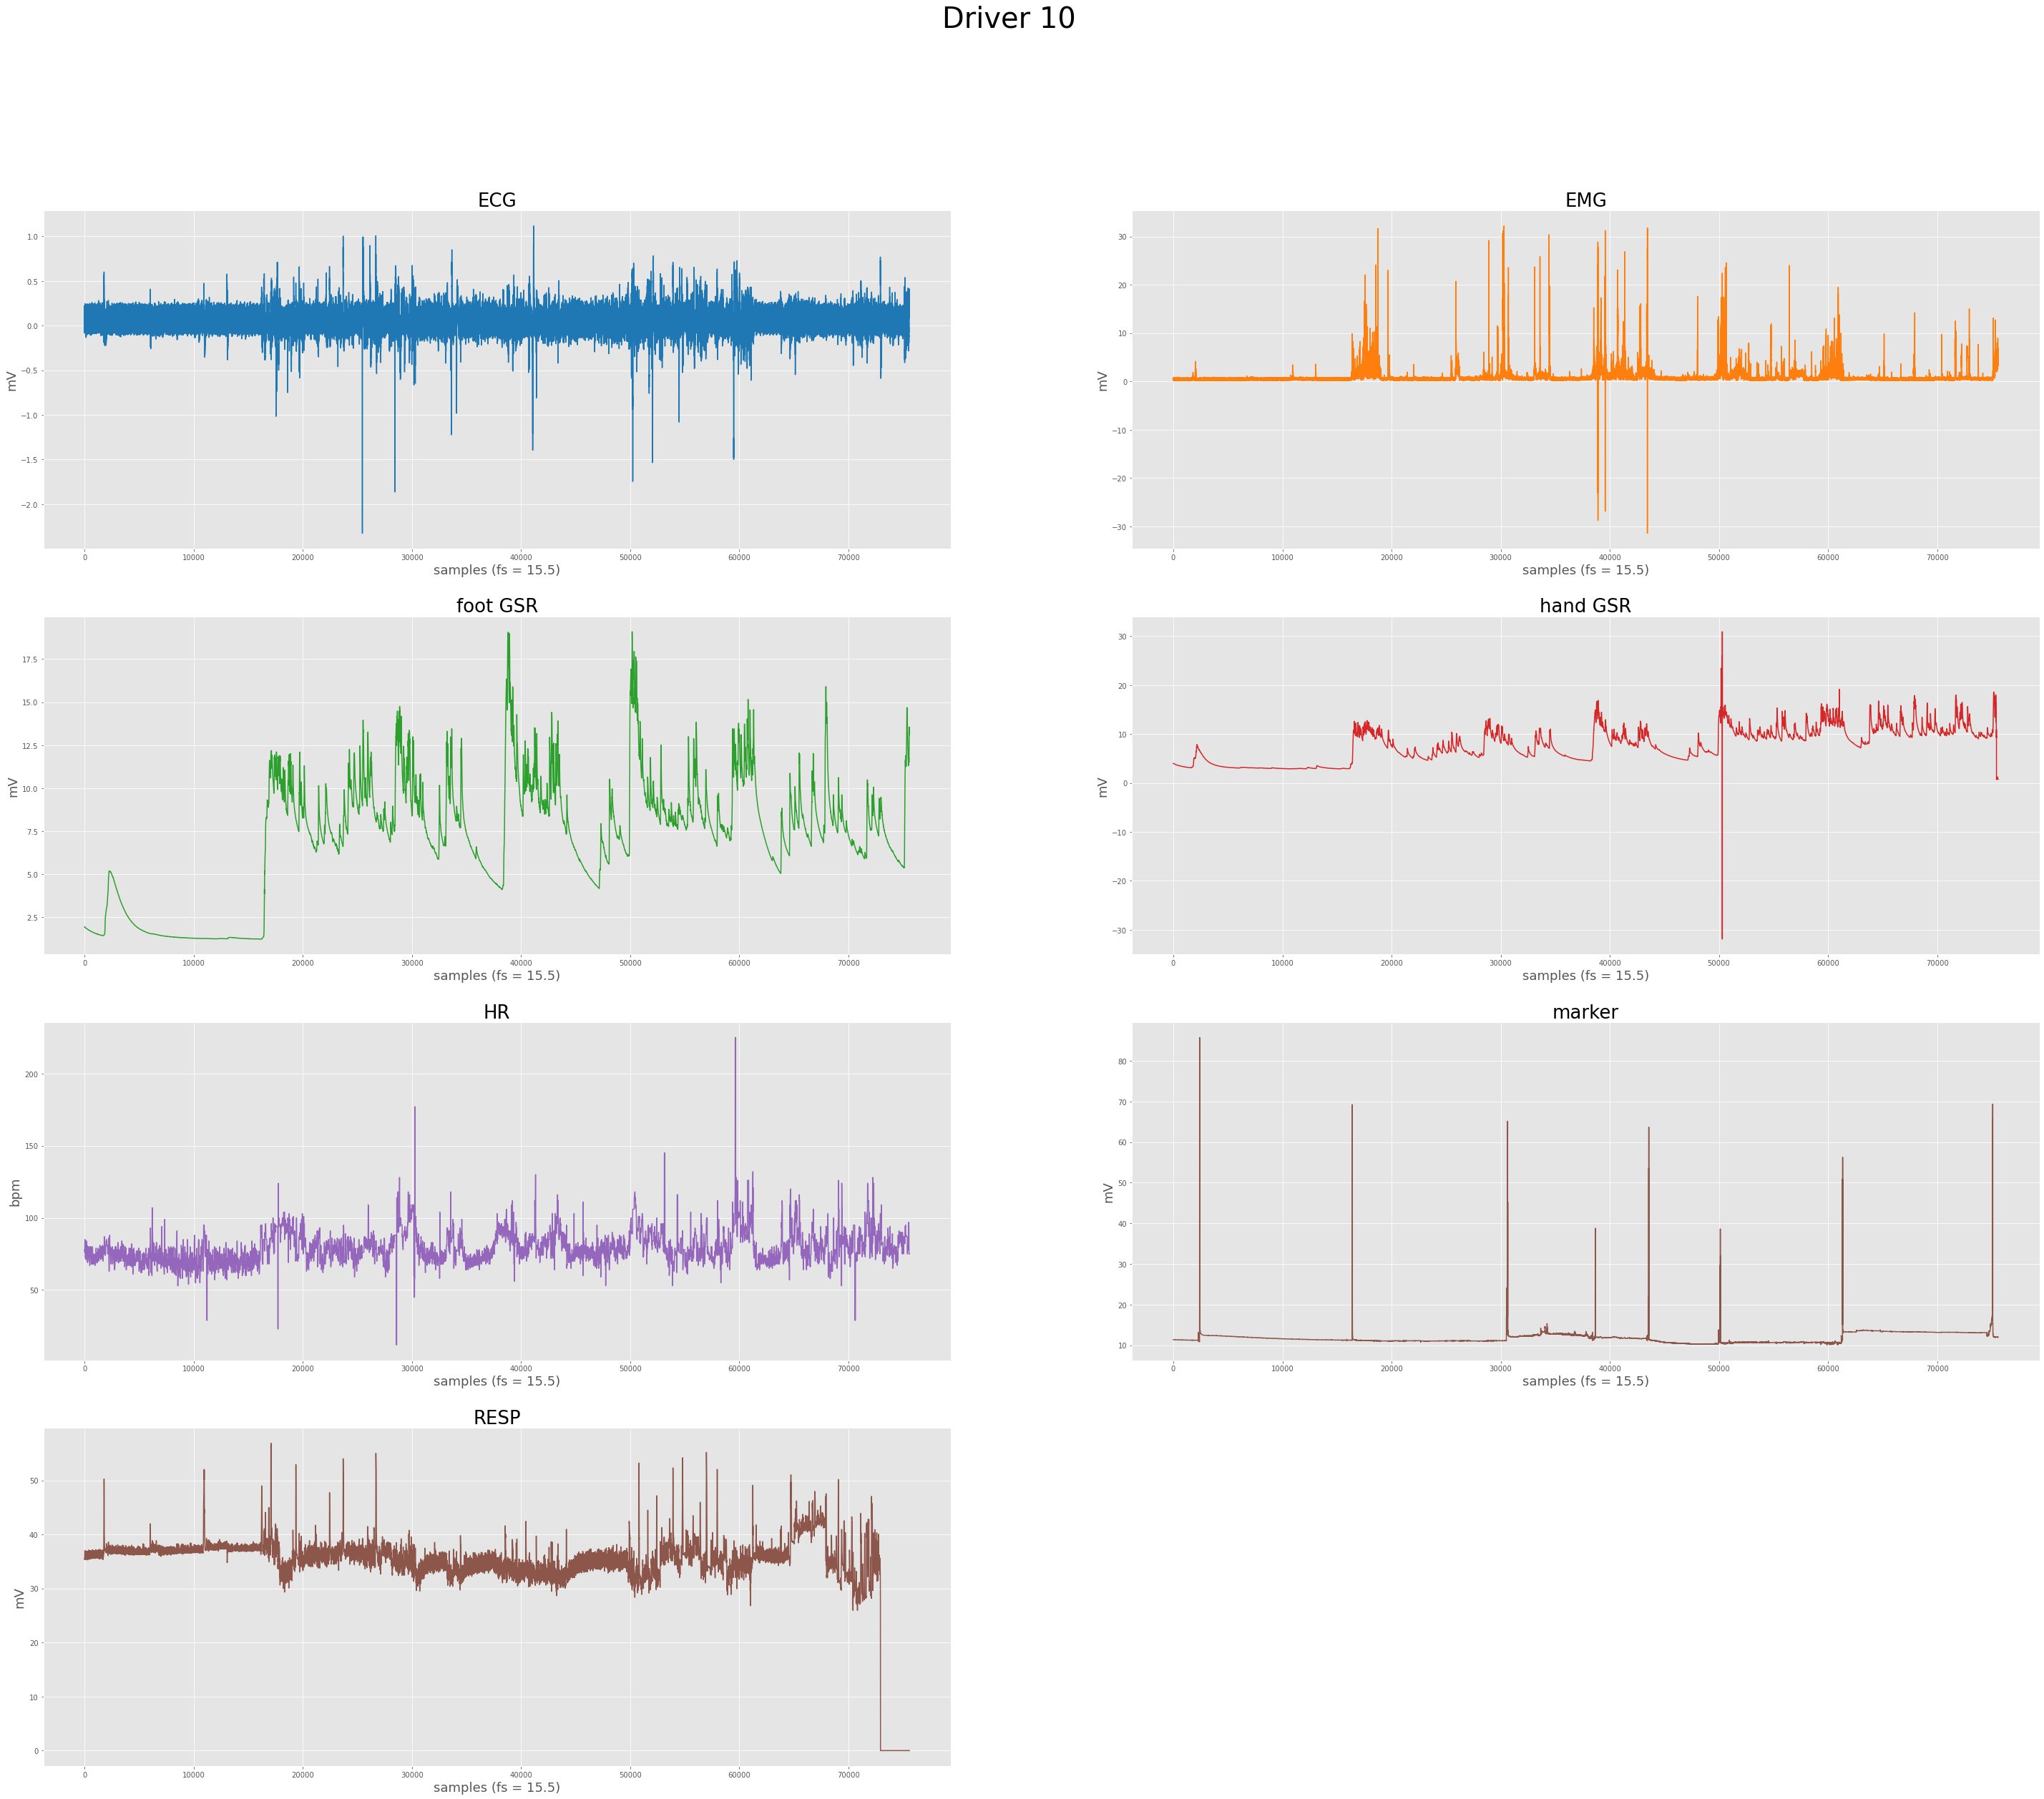

In [45]:
# Plot the sensor data of the 10th driver throughout the journey 
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 10", fontsize=40)
for i in range(all_signal[9].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[9]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[9].T[i], color=my_colors[i])
    plt.title(meta_data[9]['sig_name'][i],fontsize=26)

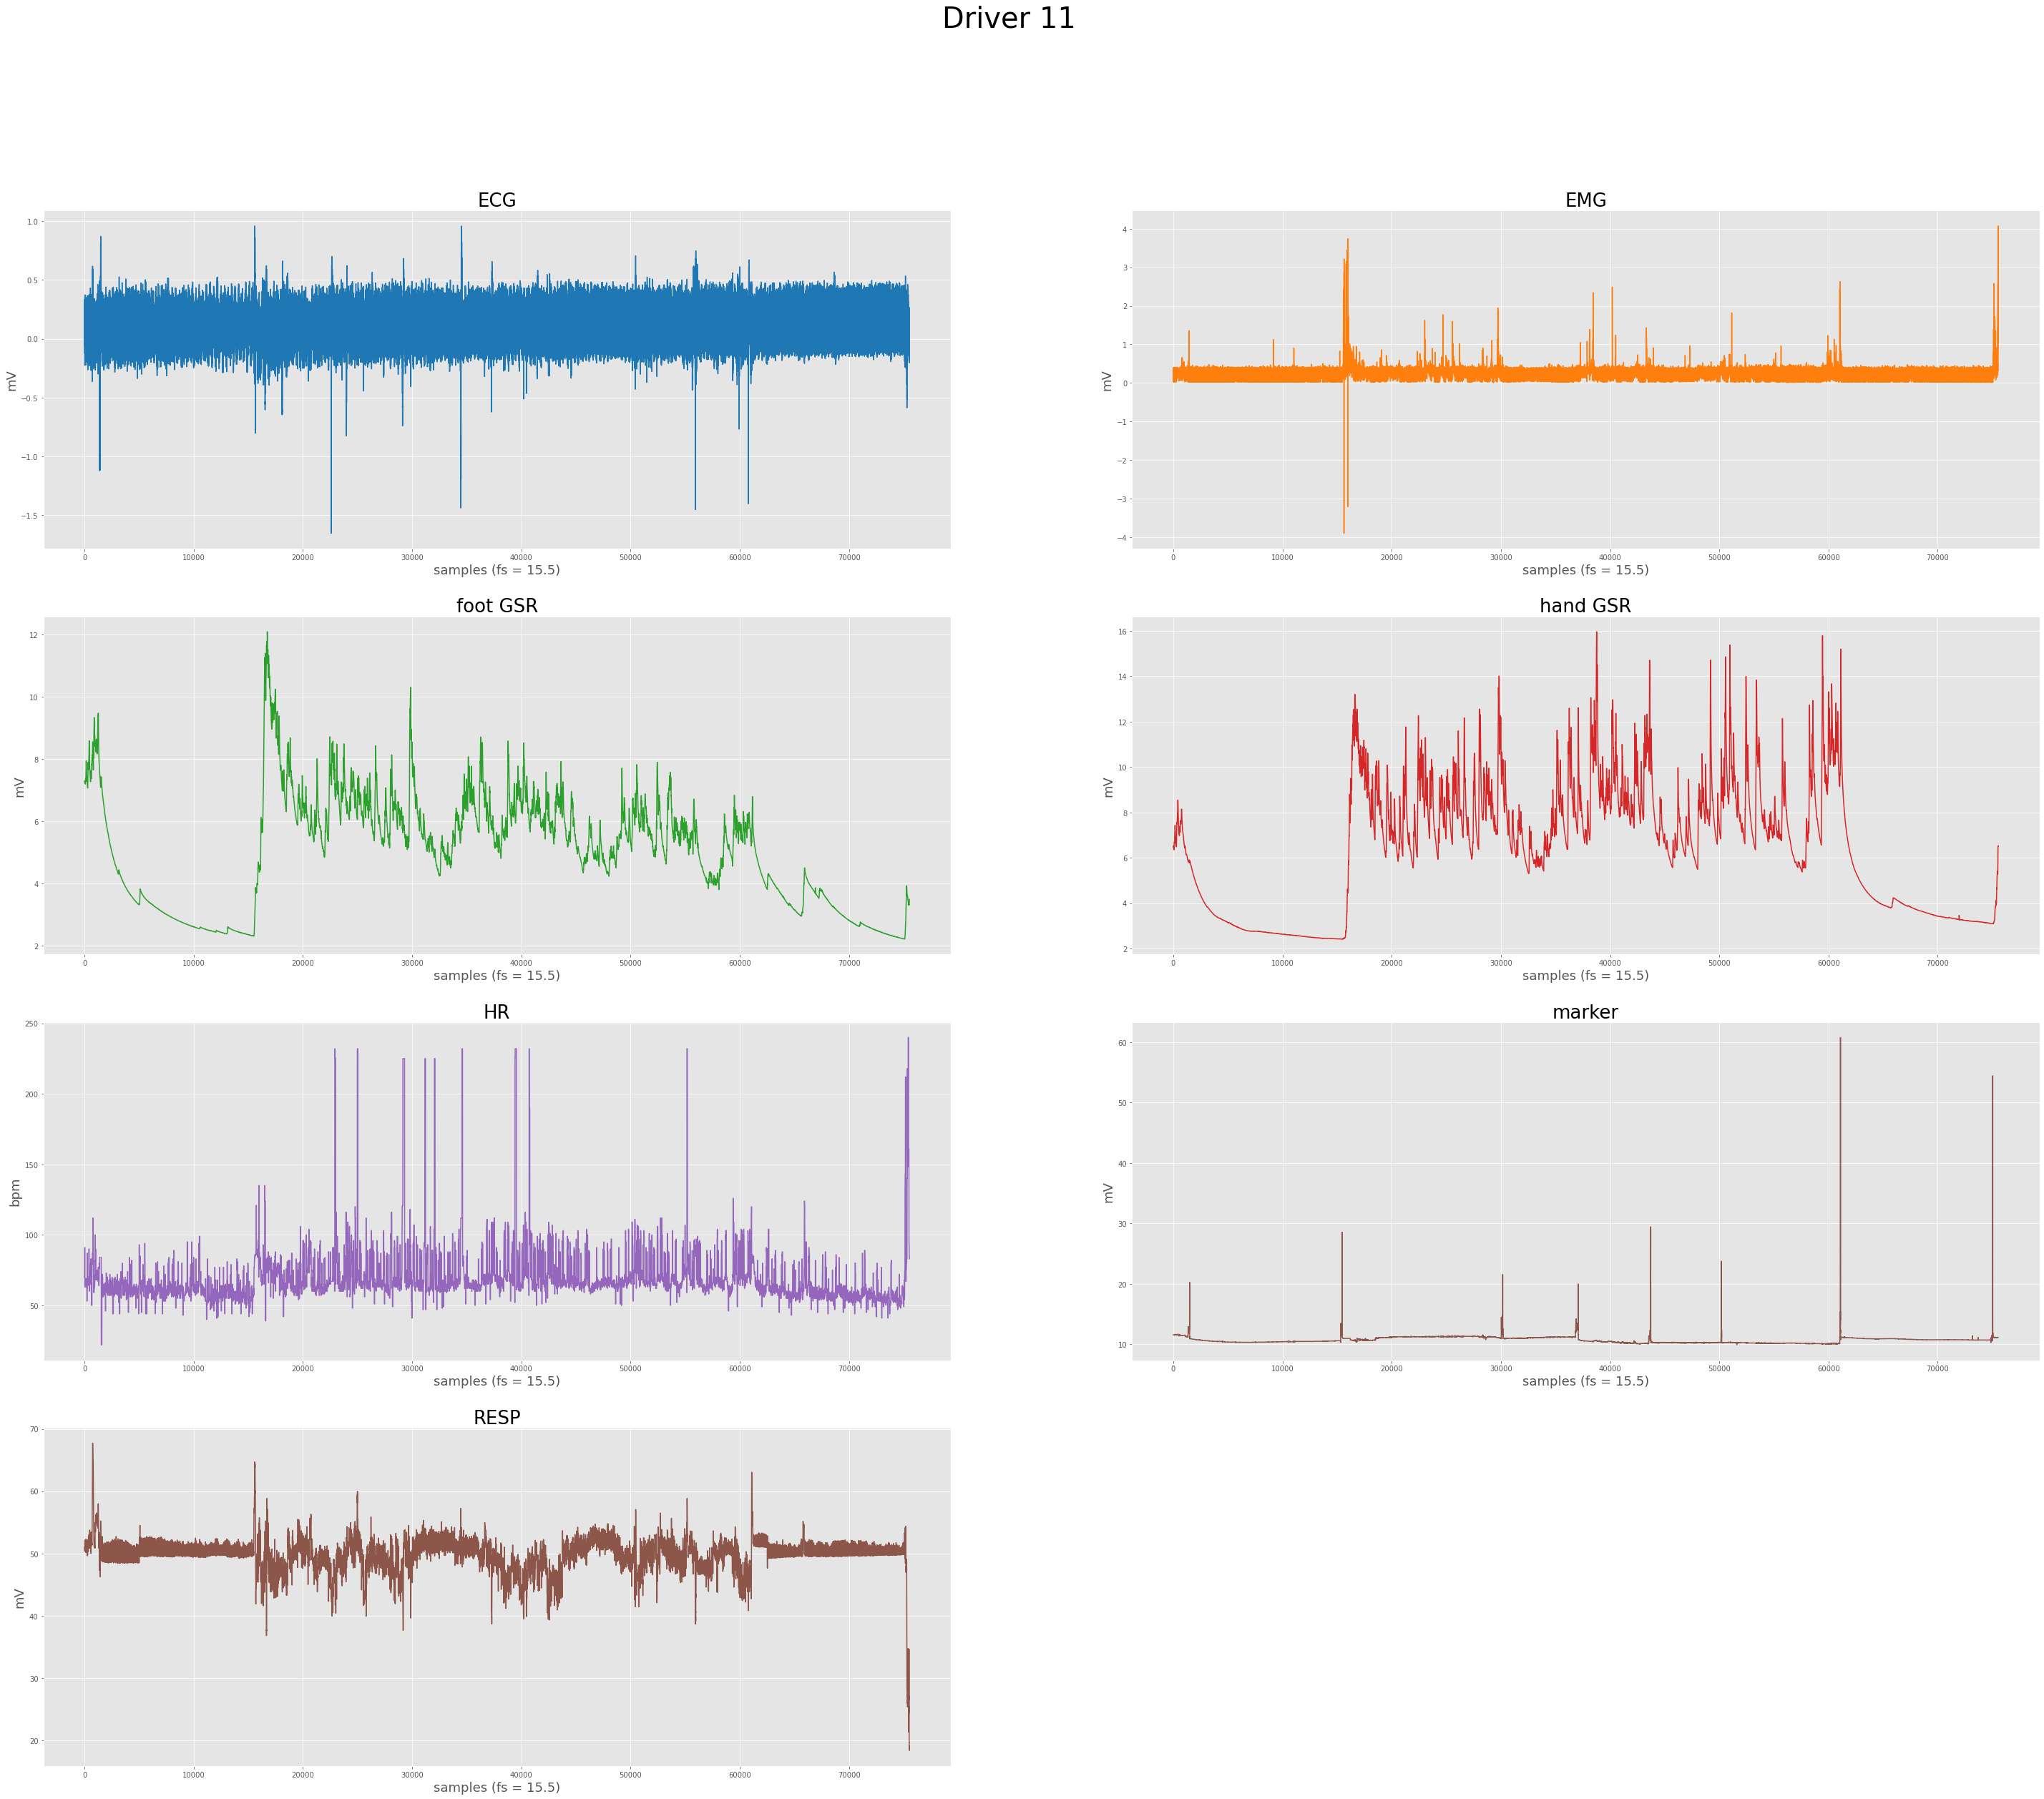

In [46]:
# Plot the sensor data of the 11th driver throughout the journey 
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 11", fontsize=40)
for i in range(all_signal[10].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[10]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[10].T[i], color=my_colors[i])
    plt.title(meta_data[10]['sig_name'][i],fontsize=26)

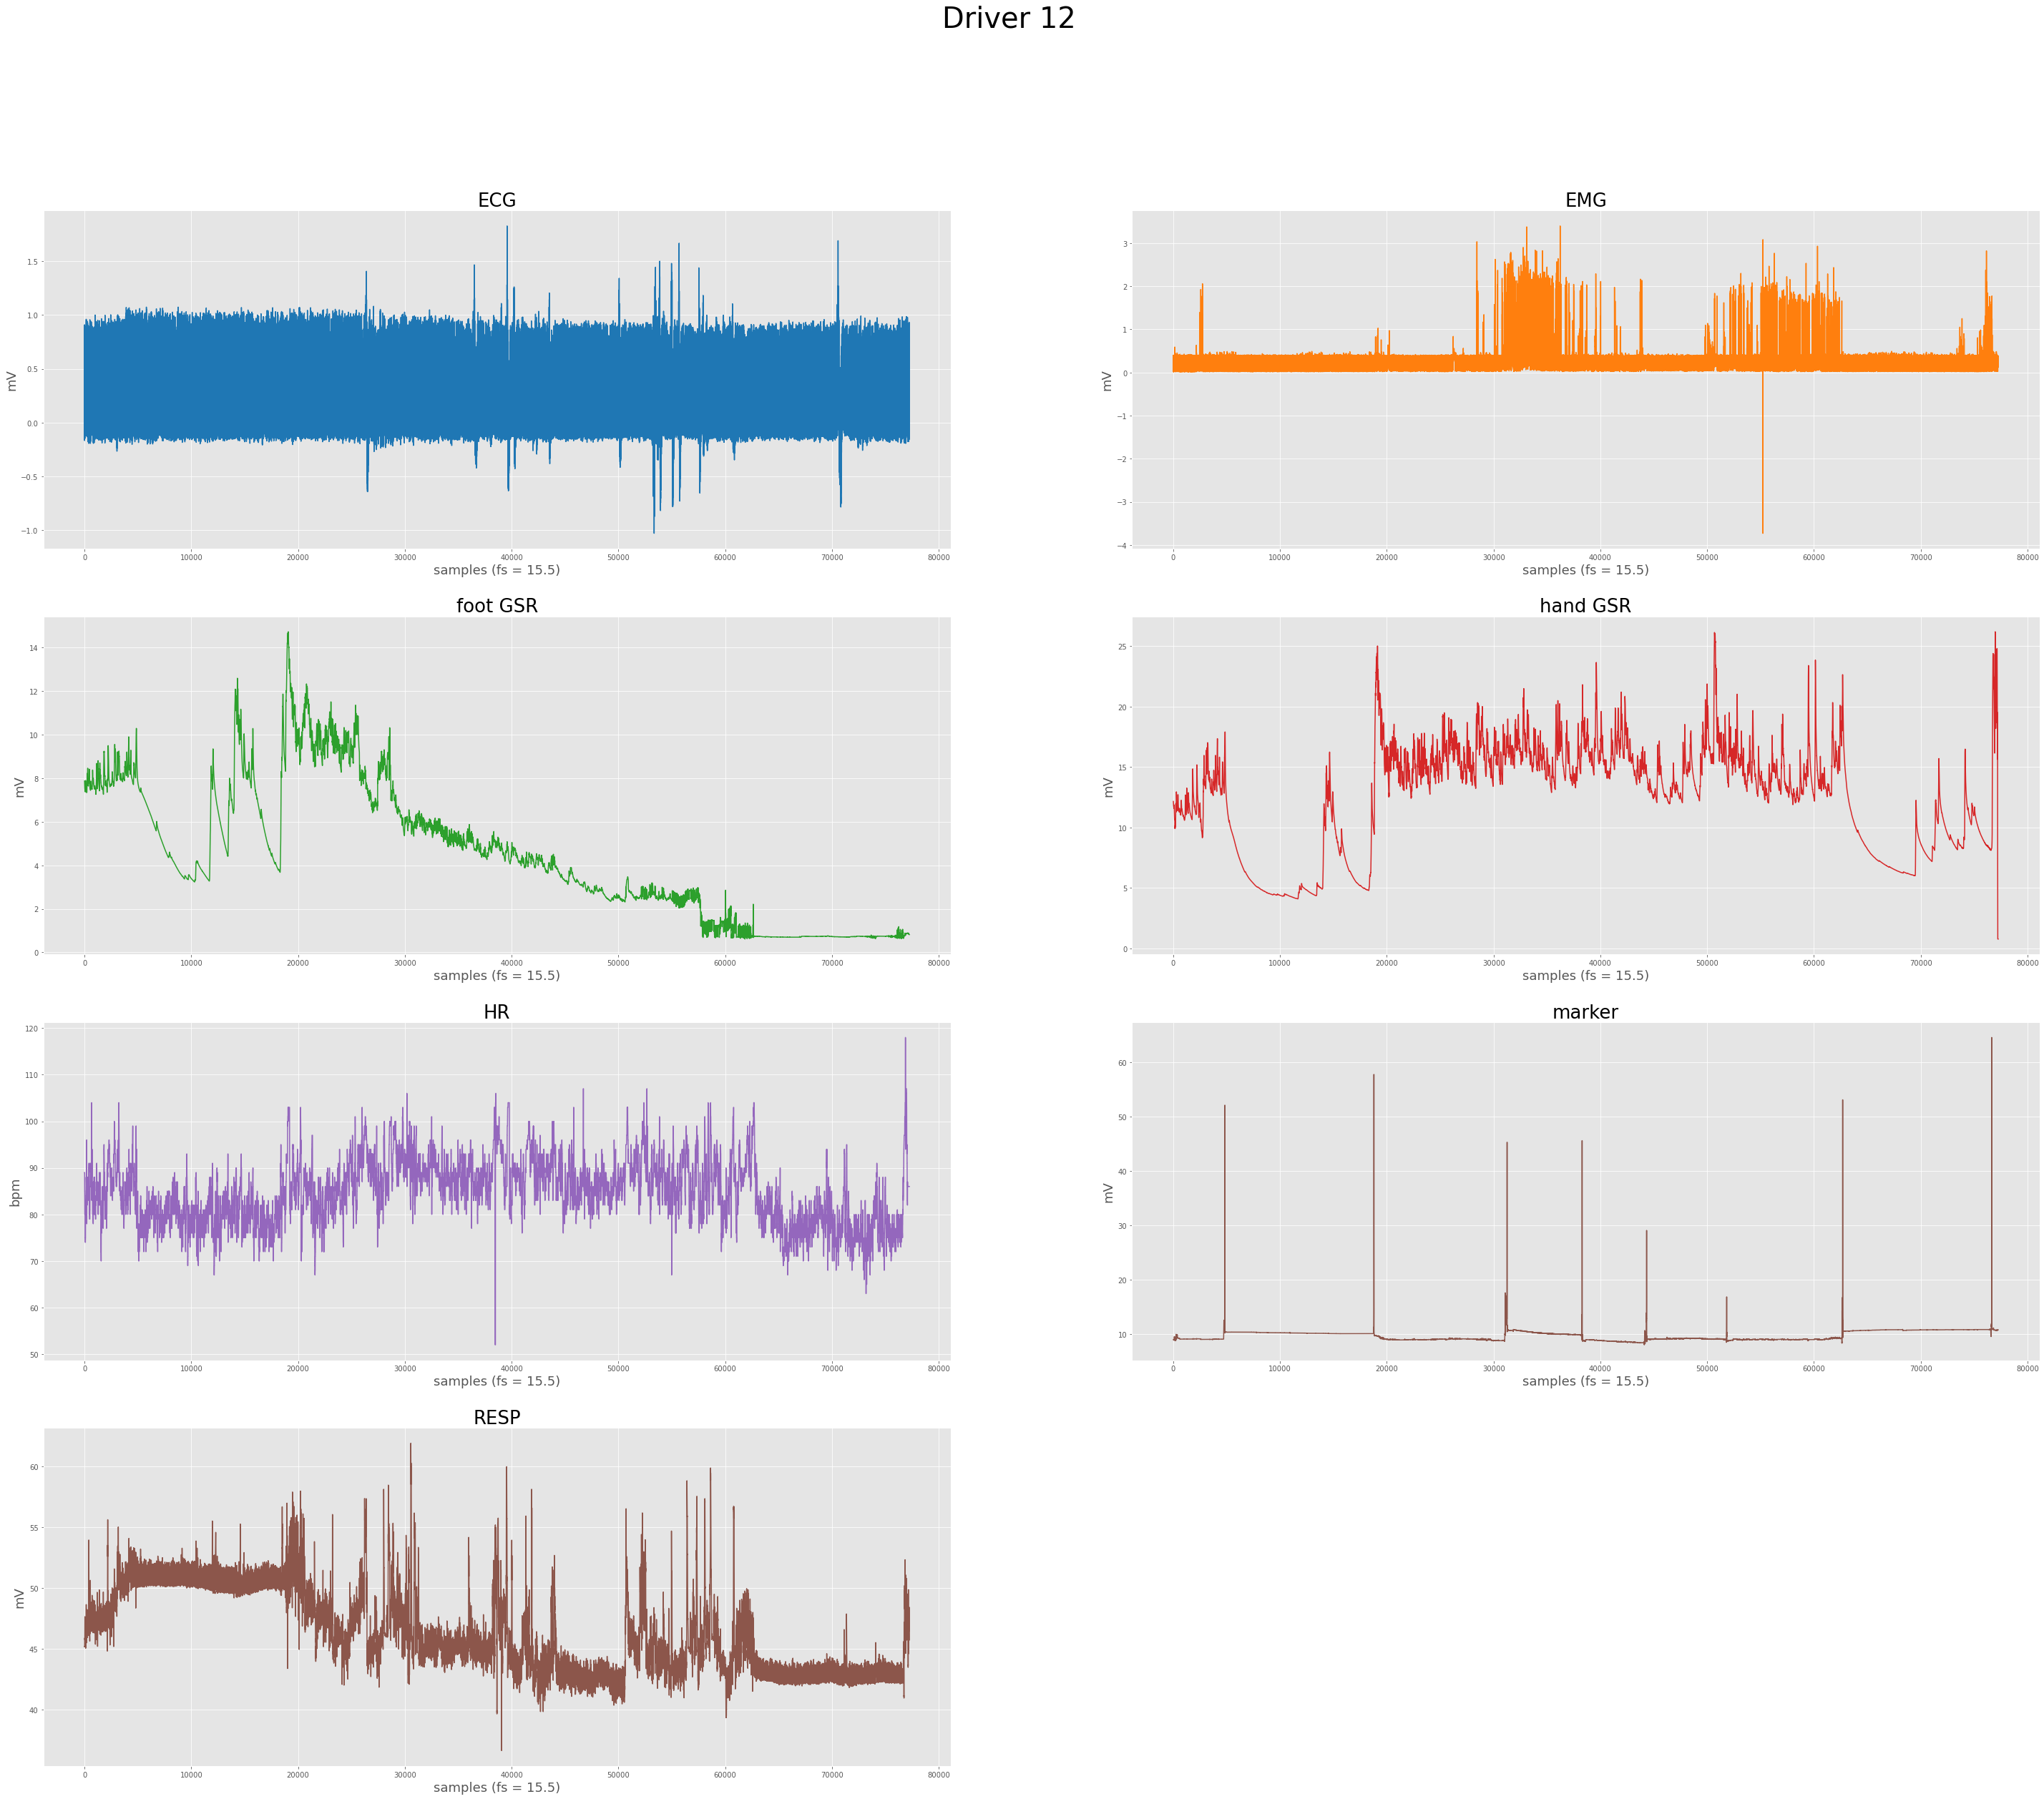

In [50]:
# Plot the sensor data of the 12th driver throughout the journey 
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 12", fontsize=40)
for i in range(all_signal[11].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[11]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[11].T[i], color=my_colors[i])
    plt.title(meta_data[11]['sig_name'][i],fontsize=26)

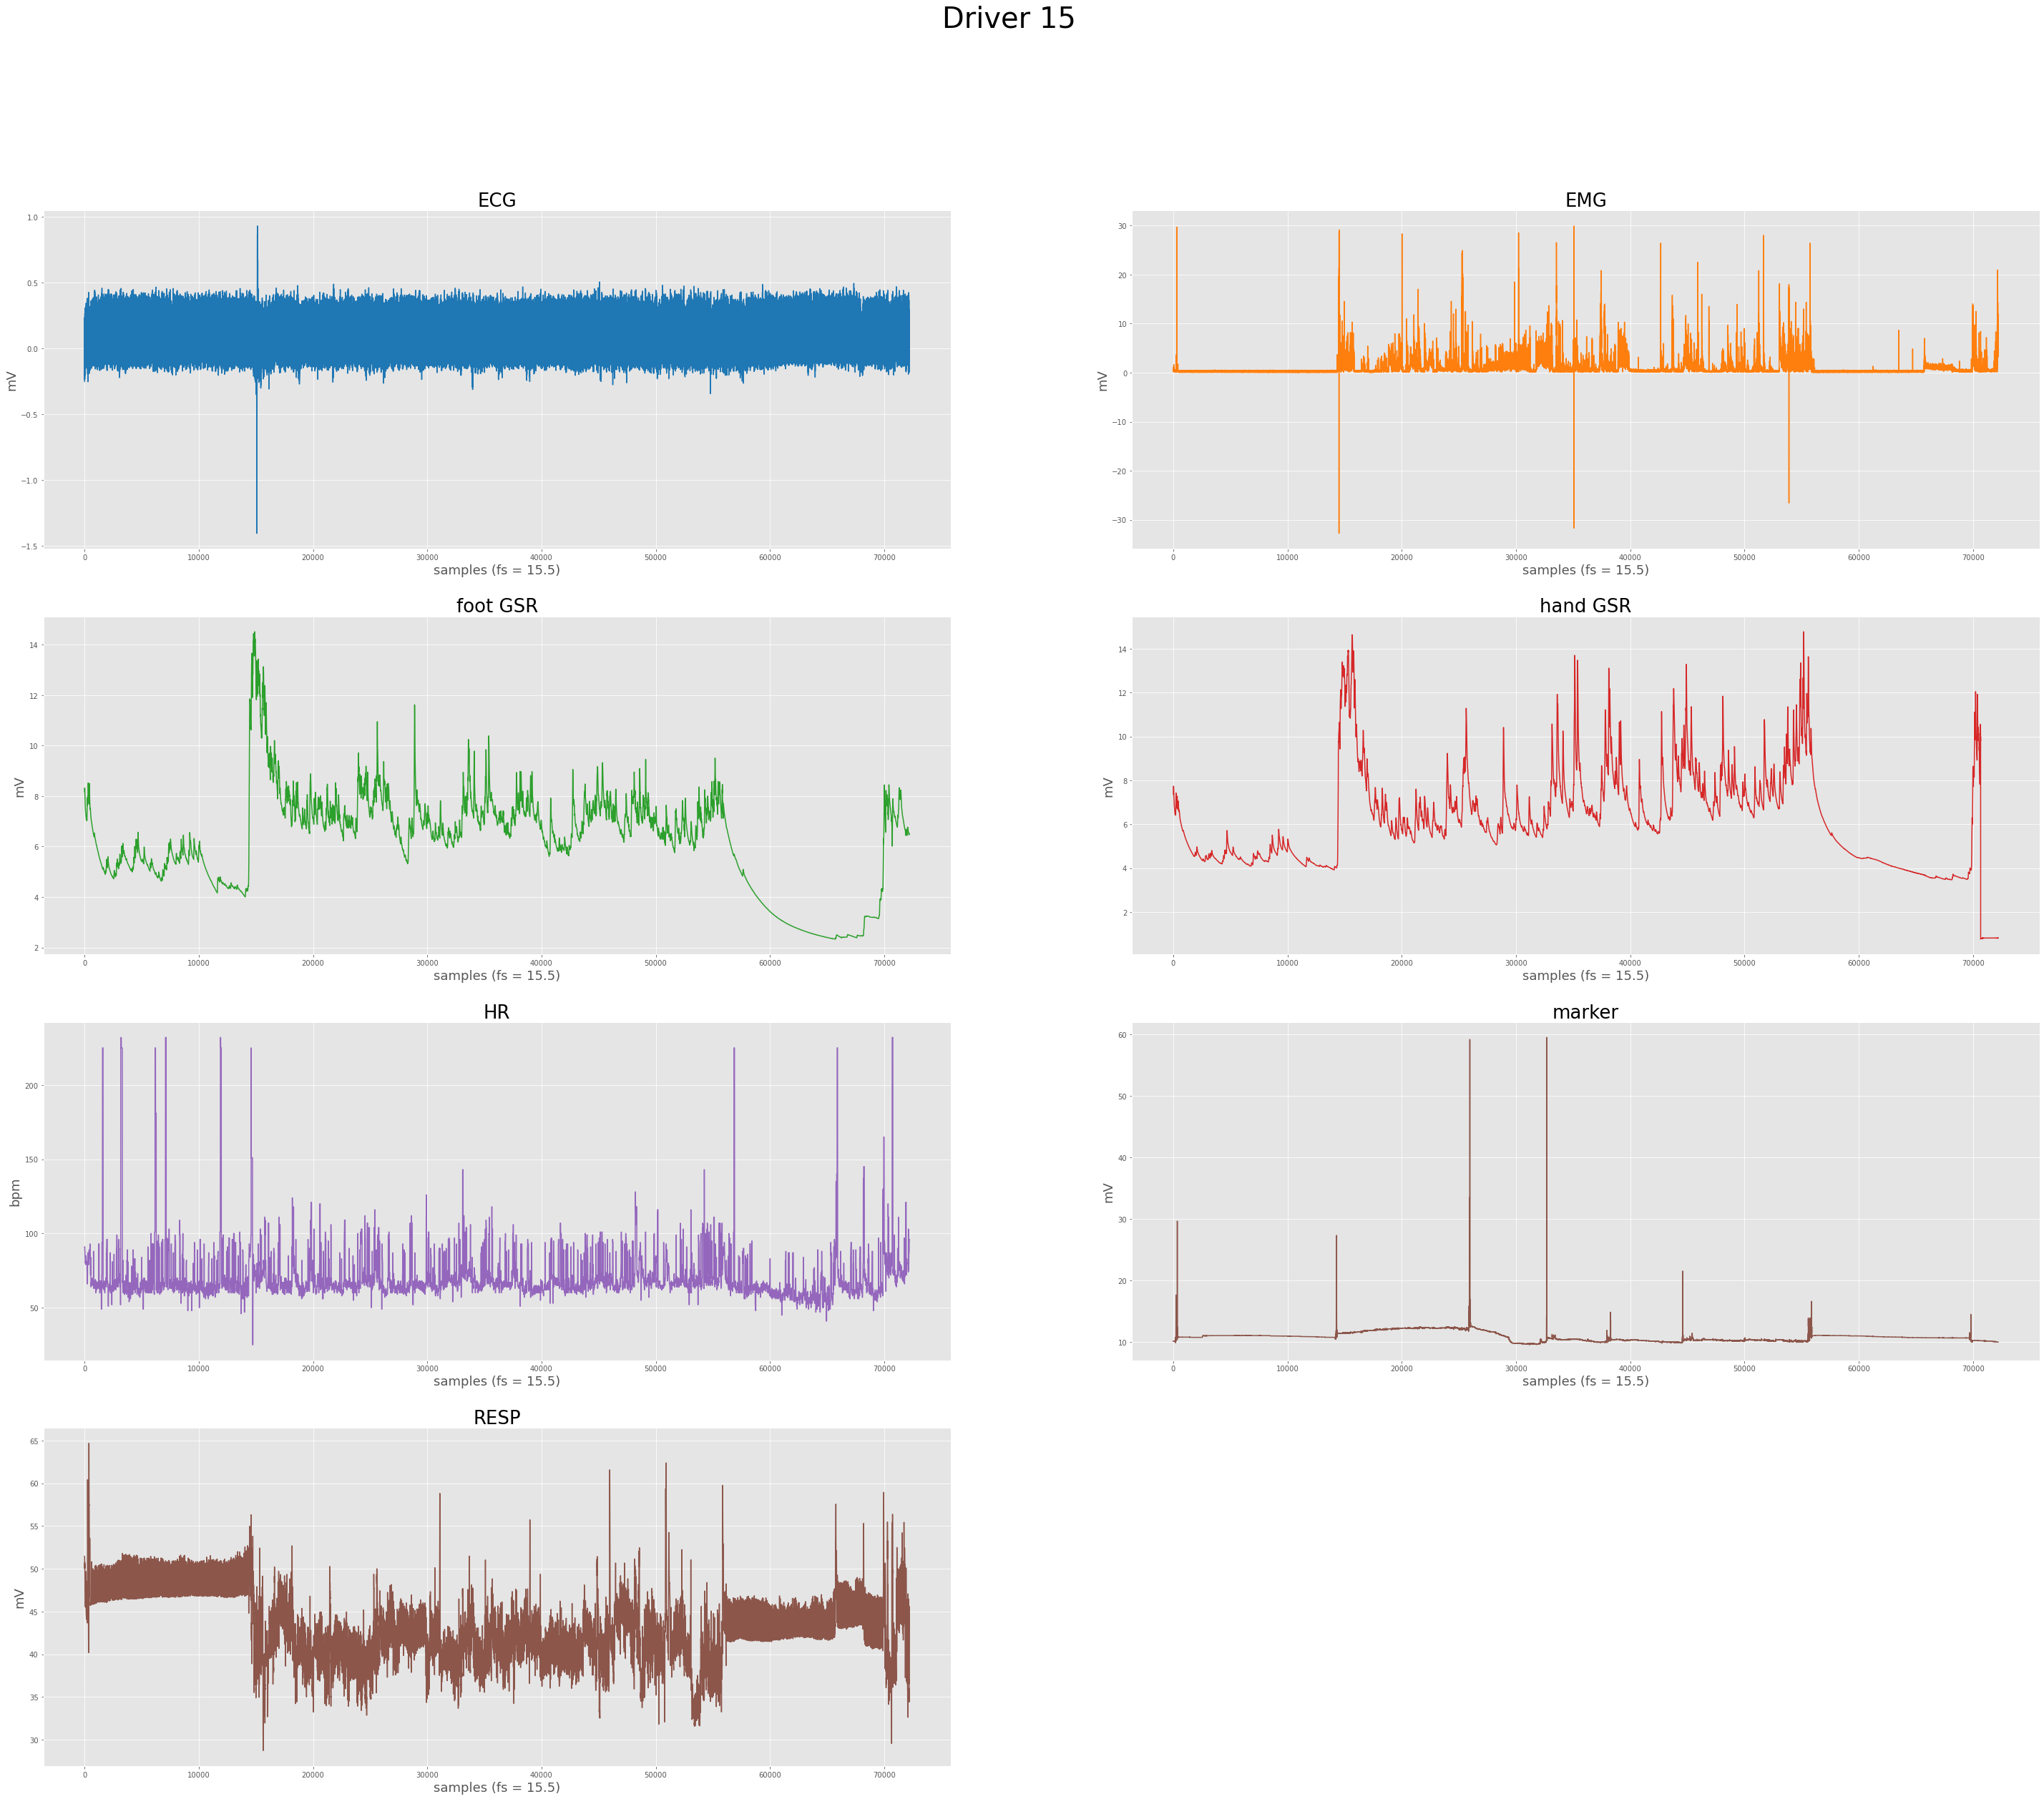

In [49]:
# Plot the sensor data of the 15th driver throughout the journey 
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 15", fontsize=40)
for i in range(all_signal[14].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[14]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[14].T[i], color=my_colors[i])
    plt.title(meta_data[14]['sig_name'][i],fontsize=26)

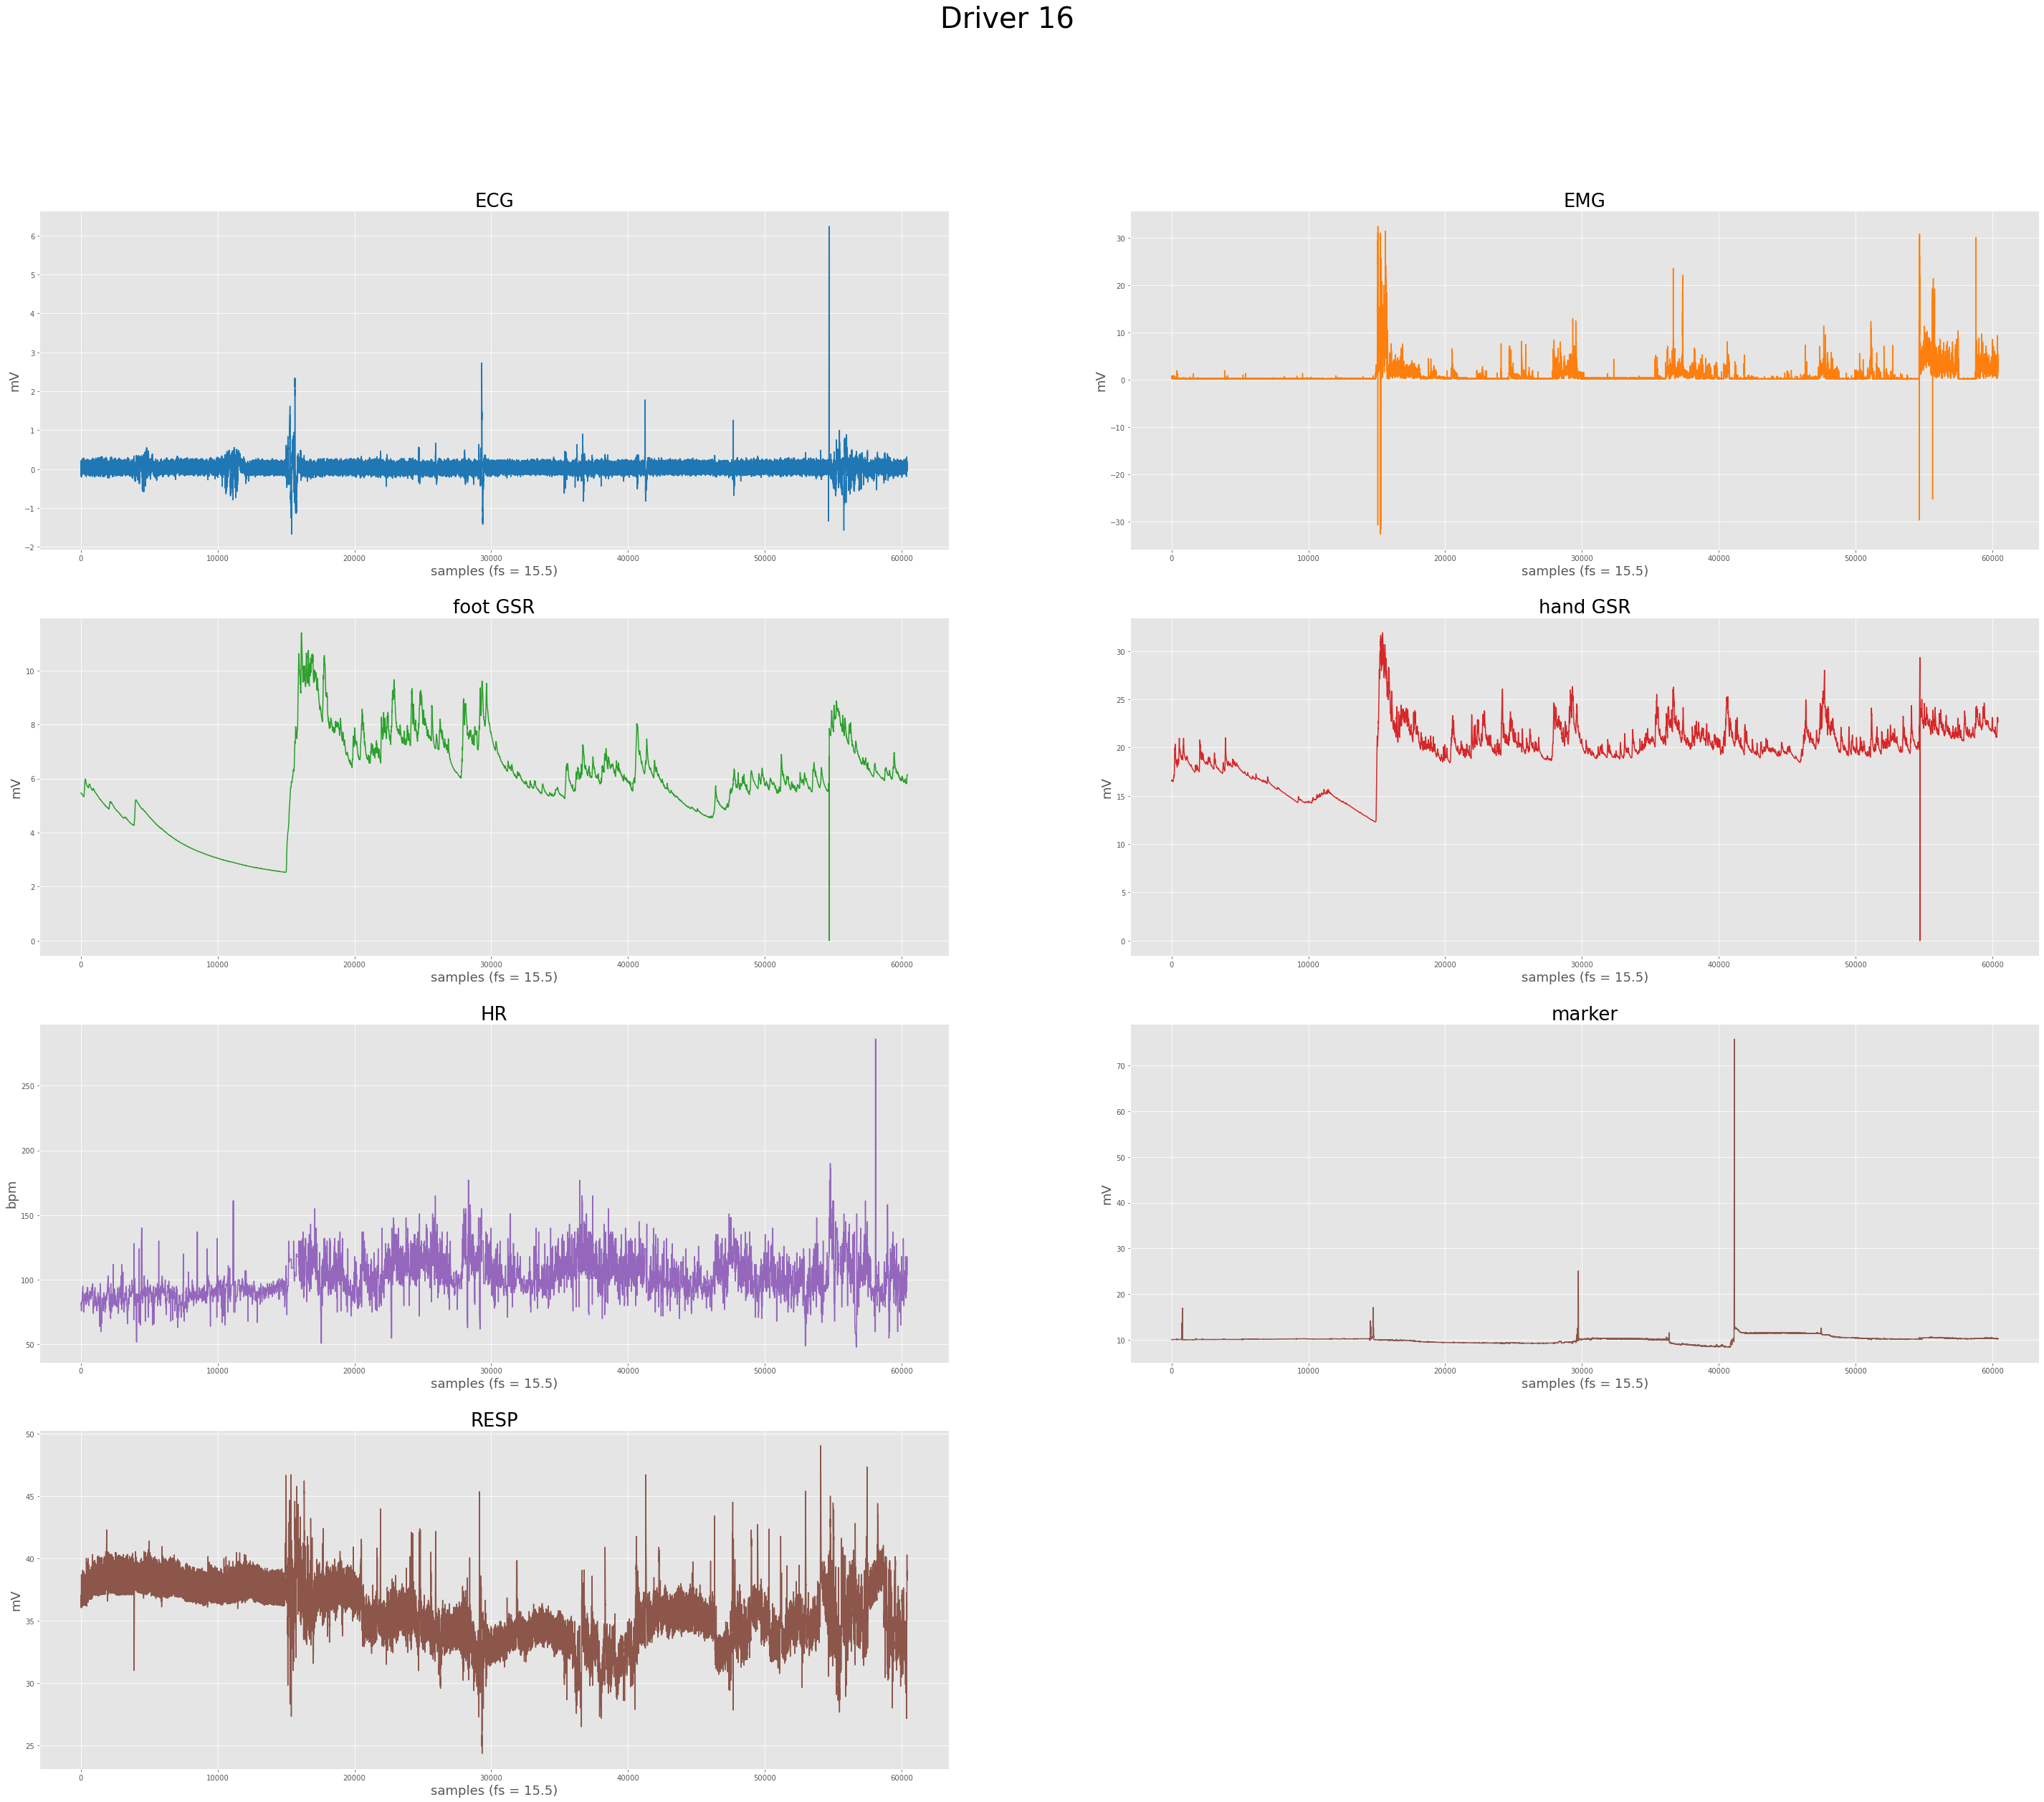

In [51]:
# Plot the sensor data of the 16th driver throughout the journey 
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 16", fontsize=40)
for i in range(all_signal[15].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[15]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[15].T[i], color=my_colors[i])
    plt.title(meta_data[15]['sig_name'][i],fontsize=26)

In [37]:
availableDriver = {4,5,6,7,8,9,10,11,14,15}
for i in availableDriver:
    print(i)

4
5
6
7
8
9
10
11
14
15


In [34]:
for i in range(18):
    x = "Driver",i+1
    print(x)

('Driver', 1)
('Driver', 2)
('Driver', 3)
('Driver', 4)
('Driver', 5)
('Driver', 6)
('Driver', 7)
('Driver', 8)
('Driver', 9)
('Driver', 10)
('Driver', 11)
('Driver', 12)
('Driver', 13)
('Driver', 14)
('Driver', 15)
('Driver', 16)
('Driver', 17)
('Driver', 18)


In [26]:
all_signal[5].T[5]

array([12.36, 12.36, 12.36, ..., 11.34, 11.34, 11.34])

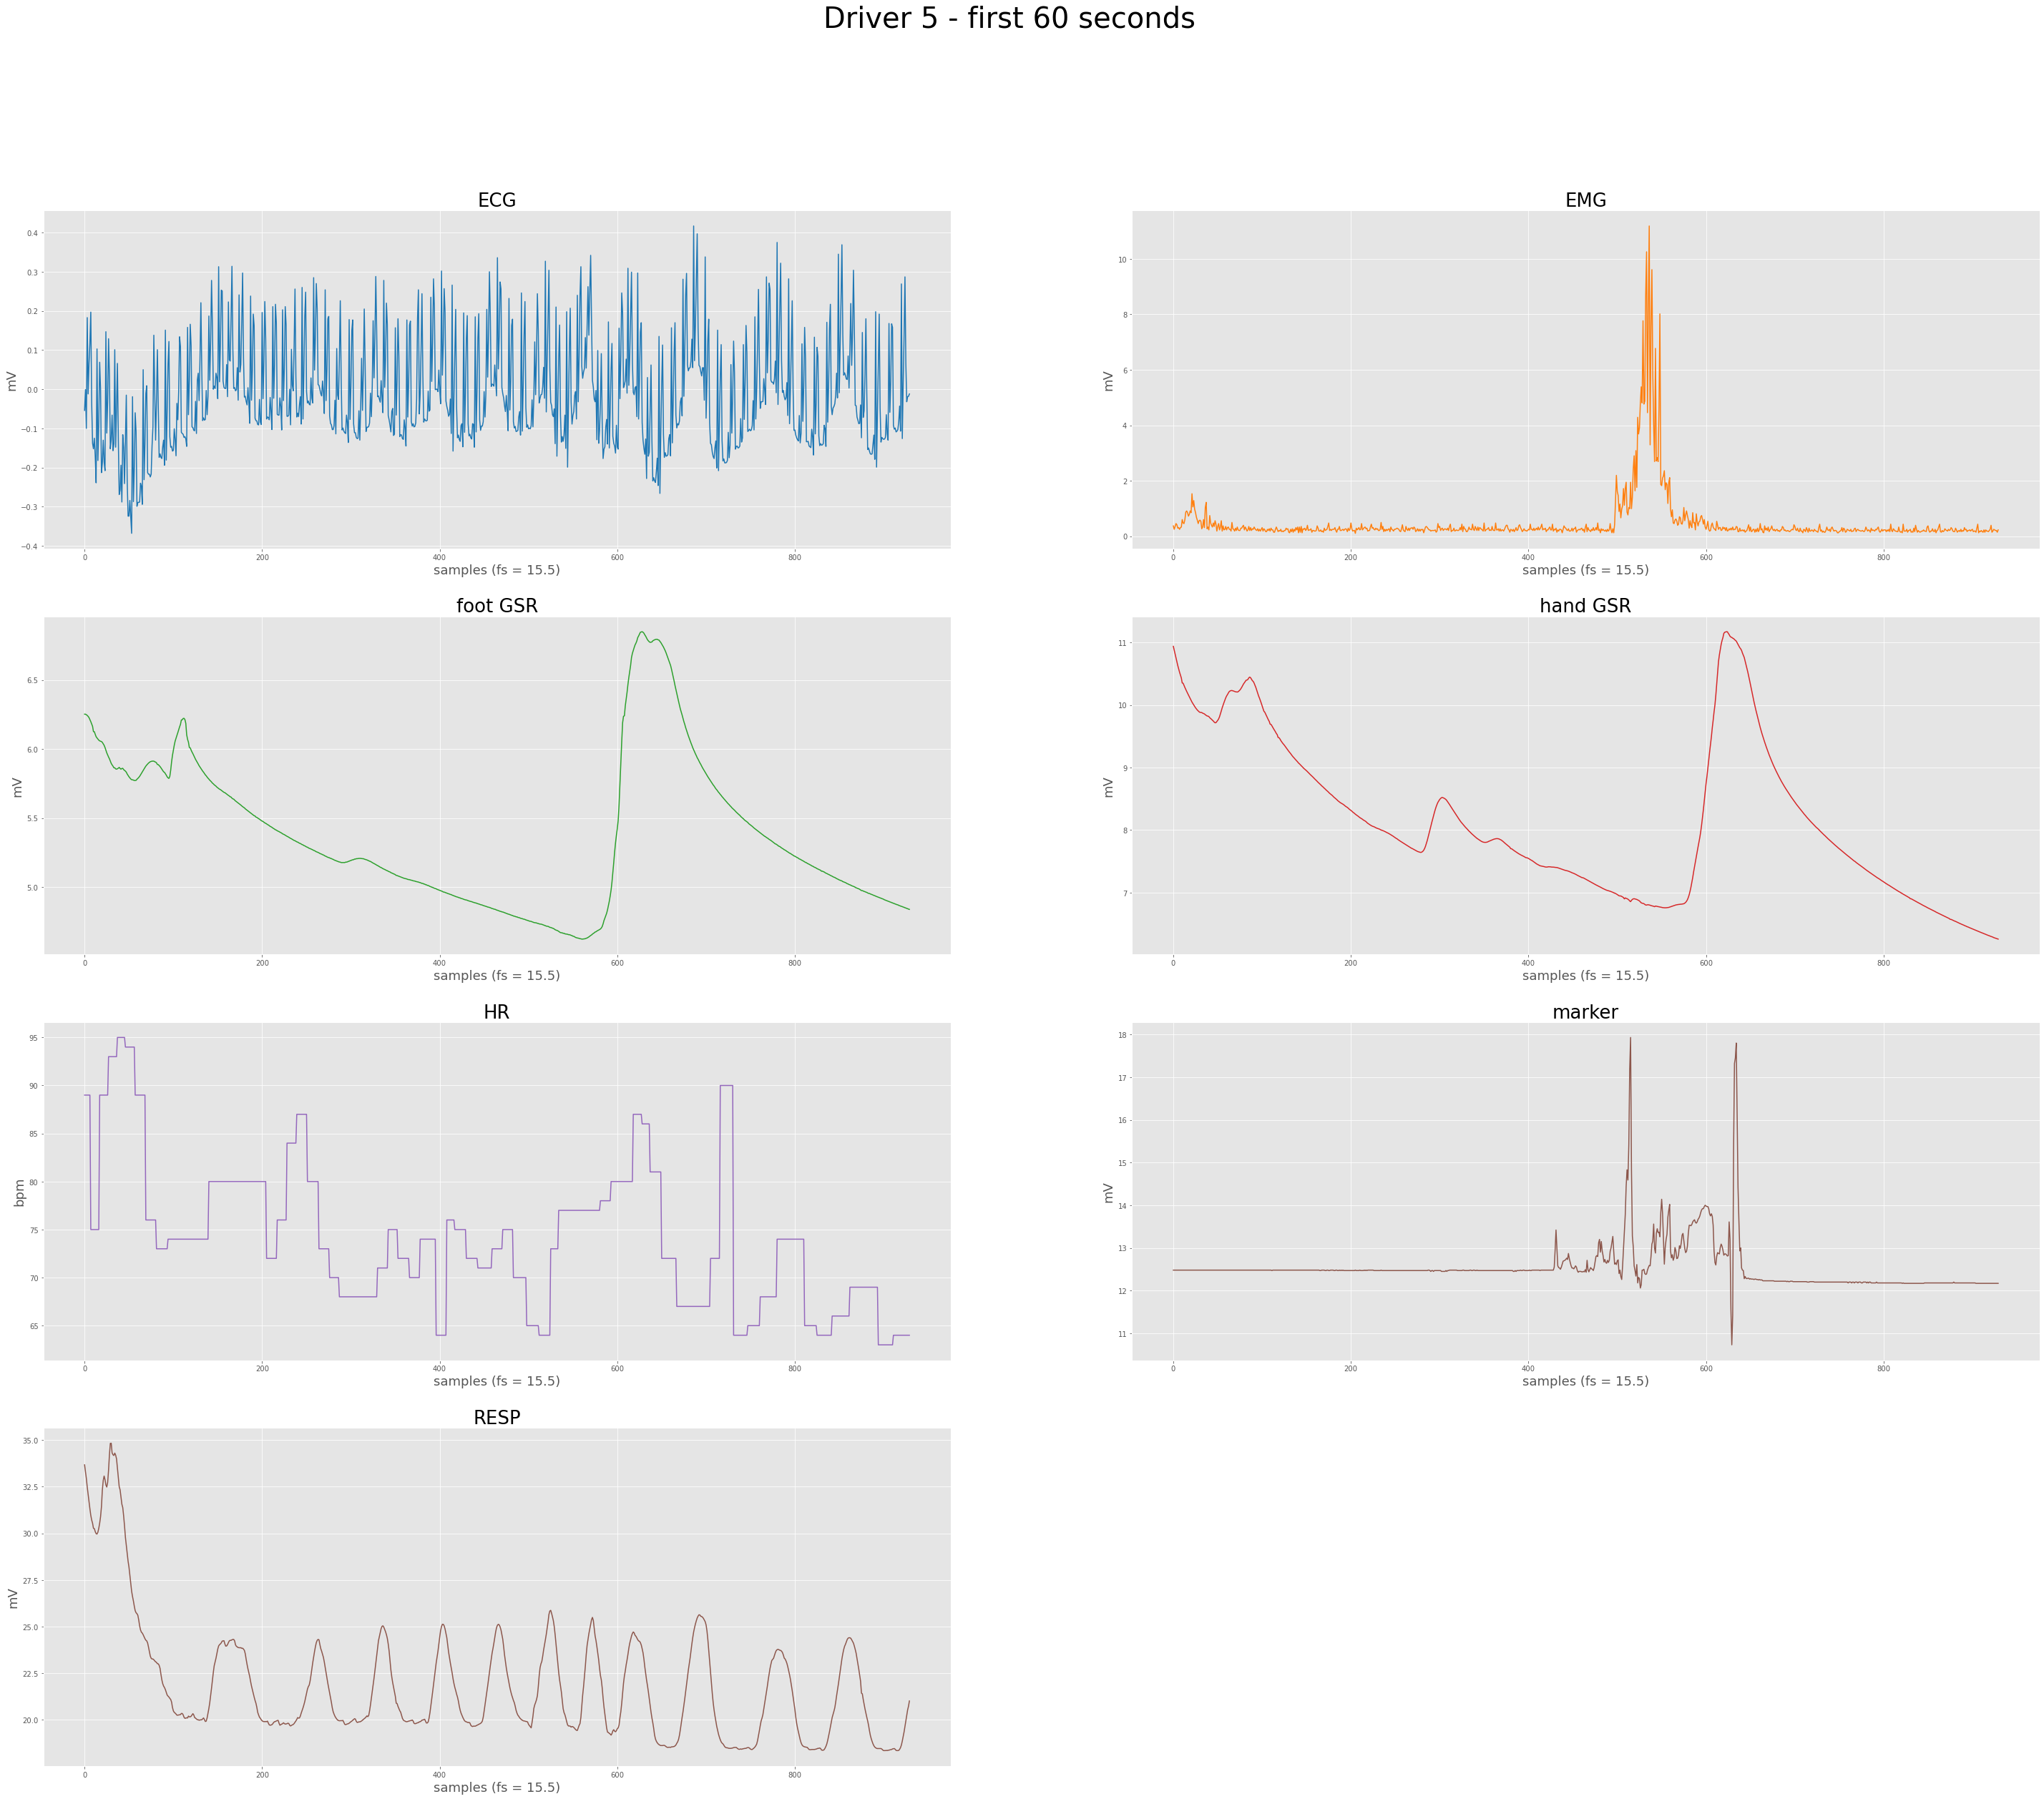

In [7]:
# Plot the data of each sensor in the first 60s of the fifth driver 
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#8c564b"]
plt.style.use('ggplot')
plt.figure(figsize=(50, 40))
plt.suptitle("Driver 5 - first 60 seconds", fontsize=40)
for i in range(all_signal[4].shape[1]):
    plt.subplot(4, 2, i + 1)
    plt.ylabel(meta_data[4]['units'][i], fontsize=18)
    plt.xlabel("samples (fs = 15.5)", fontsize=18)
    plt.plot(all_signal[4].T[i][0:int(15.5 * 60)], color=my_colors[i])
    plt.title(meta_data[4]['sig_name'][i],fontsize=26)